<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

🔹  <font color='blue'><b>    Цель проекта:</b> Проанализировать от каких параметров зависит рыночная стоимость недвижимости. Перед этим сделать предобработку данных, чтобы не изказить исследование.

## Изучение данных из файла

<div class="alert alert-info"><b>Общая информация</b> о таблице и обзор первых 5ти строк таблицы</div>

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('real_estate_data.csv', sep='\t')

print('Общая информация')
data.info()
print(60 * '= ')

print('Первые 5 строк датафрейма')
pd.set_option('display.max_columns', None)
display(data.head())

Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  ai

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.000,108.000,2019-03-07T00:00:00,3,2.700,16.000,51.000,8,NaN,False,False,25.000,NaN,Санкт-Петербург,18863.000,16028.000,1.000,482.000,2.000,755.000,NaN
1,7,3350000.000,40.400,2018-12-04T00:00:00,1,NaN,11.000,18.600,1,NaN,False,False,11.000,2.000,посёлок Шушары,12817.000,18603.000,0.000,NaN,0.000,NaN,81.000
2,10,5196000.000,56.000,2015-08-20T00:00:00,2,NaN,5.000,34.300,4,NaN,False,False,8.300,0.000,Санкт-Петербург,21741.000,13933.000,1.000,90.000,2.000,574.000,558.000
3,0,64900000.000,159.000,2015-07-24T00:00:00,3,NaN,14.000,NaN,9,NaN,False,False,NaN,0.000,Санкт-Петербург,28098.000,6800.000,2.000,84.000,3.000,234.000,424.000
4,2,10000000.000,100.000,2018-06-19T00:00:00,2,3.030,14.000,32.000,13,NaN,False,False,41.000,NaN,Санкт-Петербург,31856.000,8098.000,2.000,112.000,1.000,48.000,121.000


<div class="alert alert-info"> Информация о <b>пропусках и дубликатах </b></div>

In [61]:
print('Инофрмация о пропусках')
display(data.isna().sum())
print(60 * '= ')

print(f'Полных дубликатов: {data.duplicated().sum()}')
print(60 * '= ')

Инофрмация о пропусках


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Полных дубликатов: 0
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 


<div class="alert alert-info"> Описательная статистика данных <b></b></div>

In [62]:
#убираем scientific notation для лучшего восприятия
pd.set_option('display.float_format', lambda x: '%.3f' % x)

display(data.describe(include='all'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000,23699.000,23699.000,23699,23699.000,14504.000,23613.000,21796.000,23699.000,2775,23699,23699,21421.000,12180.000,23650,18157.000,18180.000,18181.000,8079.000,18181.000,9110.000,20518.000
unique,NaN,NaN,NaN,1491,NaN,NaN,NaN,NaN,NaN,2,2,2,NaN,NaN,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,2018-02-01T00:00:00,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN,NaN,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,368,NaN,NaN,NaN,NaN,NaN,2725,23550,23632,NaN,NaN,15721,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.858,6541548.772,60.349,NaN,2.071,2.771,10.674,34.458,5.892,NaN,NaN,NaN,10.570,1.150,NaN,28793.672,14191.278,0.611,490.805,0.770,517.981,180.889
std,5.683,10887013.268,35.654,NaN,1.078,1.261,6.597,22.030,4.885,NaN,NaN,NaN,5.905,1.071,NaN,12630.881,8608.386,0.802,342.318,0.938,277.721,219.728
min,0.000,12190.000,12.000,NaN,0.000,1.000,1.000,2.000,1.000,NaN,NaN,NaN,1.300,0.000,NaN,0.000,181.000,0.000,1.000,0.000,13.000,1.000
25%,6.000,3400000.000,40.000,NaN,1.000,2.520,5.000,18.600,2.000,NaN,NaN,NaN,7.000,0.000,NaN,18585.000,9238.000,0.000,288.000,0.000,294.000,45.000
50%,9.000,4650000.000,52.000,NaN,2.000,2.650,9.000,30.000,4.000,NaN,NaN,NaN,9.100,1.000,NaN,26726.000,13098.500,0.000,455.000,1.000,502.000,95.000
75%,14.000,6800000.000,69.900,NaN,3.000,2.800,16.000,42.300,8.000,NaN,NaN,NaN,12.000,2.000,NaN,37273.000,16293.000,1.000,612.000,1.000,729.000,232.000


<div class="alert alert-info"> Переименование столбца  <b>"cityCenters_nearest" в "city_сenters_nearest" </b> для приведения стобцов к общему виду. Проверка</div>

In [63]:
data = data.rename(columns={'cityCenters_nearest': 'city_сenters_nearest'})
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_сenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

### Вывод

**Общая информация о датасете:**
- В таблице информация о **23699** обьектах недвижимости
- Типы данных в столбцах: **first_day_exposition, floors_total, is_apartment, balcony, parks_around3000, ponds_around3000 и days_exposition** не соответствуют верным.
- Есть пропуски данных в **14ти из 22 столбцах.**
- Больше всего пропусков данных в столбцах : **is_apartment**(более 20 000), **parks_nearest**(более 15 000), **ponds_nearest**(более 14 000) и **balcony**(более 11 000)
- Полных дубликатов нет
- Во многих столбцах есть выбросы

Подробнее рассмотрим ниже

## Предобработка данных

<div class="alert alert-info"> <b>Доля пропусков от числа всех ячеек в столбце</b></div>

In [64]:
print('Доля пропусков от числа всех ячеек в столбце')
display(data.isna().mean())

Доля пропусков от числа всех ячеек в столбце


total_images           0.000
last_price             0.000
total_area             0.000
first_day_exposition   0.000
rooms                  0.000
ceiling_height         0.388
floors_total           0.004
living_area            0.080
floor                  0.000
is_apartment           0.883
studio                 0.000
open_plan              0.000
kitchen_area           0.096
balcony                0.486
locality_name          0.002
airports_nearest       0.234
city_сenters_nearest   0.233
parks_around3000       0.233
parks_nearest          0.659
ponds_around3000       0.233
ponds_nearest          0.616
days_exposition        0.134
dtype: float64

**Столбцы необходимые для анализа**

- **ceiling_height** -  Более 38% пропусков от всей информации по этому столбцу. Вероятно это связано с тем, что люди не знают или не считают важным показателем высоту потолка. Заполним пропуски медианным значением по столбцу. Так же есть неадекватные выбросы значений.(минимальное значение - 1м, максимальное - 100м).
- **floors_total** - Меньше 1 % пропусков. Это важный показатель. Заполнить пропуски средним или медианой будет не верно. При анализе избавимся от строк с неполной информацией, так как их немного. 
- **living_area** - 8% пропусков. Так же есть неадекватные выбросы значений.(минимальное значение - 2м, максимальное - 409м). Найдем медианный коэффициент отношения площади living_area к total_area. Заполним пропуски через этот коэффициент.
- **kitchen_area** - Почти 10% пропусков. Заполним пропуски медианным отношением кухни к общей площади квартир. Так же есть неадекватные выбросы значений.(минимальное значение - 1,3м, максимальное - 120м).
- **locality_name** - Менее 1% пропусков. От остальных избавимся. Так же проверим столбец на неявные дубликаты и устраним их.
- **city_centers_nearest** - 23% пропусков. Пропуски образовались потому, что люди не указали расстояние. Важный показатель. Заполнить медианами будет не верно. Не будем заполнять ничем.
- **days_exposition** - 13% пропусков. Скорей всего это обьявления, которые еще не сняты или которые появились сегодня. Заполним пропуски значем 0, чтобы не терять данные.


**Столбцы которые не будут участвовать в анализе**

- **is_apartment** - 88 % пропусков. Учитывая, что столбец имеет 2 варианта значений: True и False - все пропущенные значения предлагаю заполнить False. Пропуски в ячейках - это вероятнее всего показатель того, что данное жилье не является апартаментами. Расмотрим подробнее этот столбец и заполним пропуски в ячейках ниже.
- **balcony** - 48% пропусков. Пропуски вероятнее всего означают отсутствие балкона в квартире. Поэтому ниже заполним пропуски значением "0". Неадекватных значений нет.
- **airports_nearest** - 23% пропусков. Пропуски образовались потому, что люди не указали расстояние. Заполнять пропуски пока не будем.
- **parks_around3000** - 23% пропущенных значений вероятнее всего говорят о том, что парка в пределах 3км нет. Можно заменить пропуски на "0", так как значения ячеек - это количество парков. Рассмотрим подробнее столбец и заполним пропуски в ячейках ниже.
- **ponds_nearest** - 65% пропусков. Пропуски образовались потому, что люди не указали расстояние. Заполнять пропуски не будем.
- **ponds_around3000** - - 23% пропущенных значений вероятнее всего говорят о том, что водоема в пределах 3км нет. Можно заменить пропуски на "0", так как значения ячеек - это количество водоемов. Рассмотрим подробнее столбец и заполним пропуски в ячейках ниже.
- **ponds_nearest** - 65% пропусков. Пропуски образовались потому, что люди не указали расстояние. Заполнять пропуски не будем.

<div class="alert alert-info">  Проверяем чтобы медиана столбца <b>ceiling_height</b> не выбивалась из медианных значений высоты потолков по городам. Заполняем все пропуски медианными значениями по столбцу <b>ceiling_height</b>. 
    Делаем проверку после замены.</div>

In [65]:
median_ceiling_height = data.ceiling_height.median()
print('Медиана столбца ceiling_height')
print(median_ceiling_height)
print(60 * '= ')

print('Медианные значения высоты потолков в разных городах')
print(data.pivot_table(index = 'locality_name', values = 'ceiling_height', aggfunc=['median','count'])
      .sort_values(by=[('count','ceiling_height')], ascending = False).head(10))
print(60 * '= ')

#Замена всех пропуски в столбце 'ceiling_height' на 'median_ceiling_height'
data['ceiling_height'] = data['ceiling_height'].fillna(median_ceiling_height)

print('Проверка пропусков в столбце ceiling_height')
print(data.ceiling_height.isna().sum())
print(60 * '= ')

Медиана столбца ceiling_height
2.65
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Медианные значения высоты потолков в разных городах
                          median          count
                  ceiling_height ceiling_height
locality_name                                  
Санкт-Петербург            2.700          10104
Всеволожск                 2.700            272
Пушкин                     2.600            234
посёлок Шушары             2.630            217
Колпино                    2.500            203
посёлок Мурино             2.700            200
Гатчина                    2.550            149
Петергоф                   2.550            145
посёлок Парголово          2.640            137
Сестрорецк                 2.700            129
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Проверка пропусков в столбце ceiling_height
0


<div class="alert alert-info">  
     Избавимся от строк с пустыми значениями <b>floors_total</b>. Их немного. Не повлияет на анализ</div>

In [66]:
data = data.dropna(subset = ['floors_total'])
print('= '*60)
print(f'После удаление строк с пропусками в столбце locality_name осталось {len(data)} из 23699')
print('= '*60)

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
После удаление строк с пропусками в столбце locality_name осталось 23613 из 23699
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 


<div class="alert alert-info">  
     Заполним пропуски в столбце <b>living_area</b>. Найдем медианный коэффициент отношения площади <b>living_area к total_area</b>. Заполним пропуски через этот коэффициент.
    Делаем проверку после замены</div>

In [67]:
koef_living_area = (data['living_area'] / data['total_area']).median()
print('Медиана коэффициента living_area к total_area')
print(koef_living_area)
data['living_area'] = data['living_area'].fillna(data['total_area'] * koef_living_area)
print(60 * '= ')

print('Пропуски в столбце living_area после обработки')
print(data['living_area'].isna().mean())
print(60 * '= ')

print('Проверка. В строке с индеком 3 был пропуск в столбце living_area - заполнился верно')
display(data.head())

Медиана коэффициента living_area к total_area
0.5681818181818182
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Пропуски в столбце living_area после обработки
0.0
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Проверка. В строке с индеком 3 был пропуск в столбце living_area - заполнился верно


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.000,108.000,2019-03-07T00:00:00,3,2.700,16.000,51.000,8,NaN,False,False,25.000,NaN,Санкт-Петербург,18863.000,16028.000,1.000,482.000,2.000,755.000,NaN
1,7,3350000.000,40.400,2018-12-04T00:00:00,1,2.650,11.000,18.600,1,NaN,False,False,11.000,2.000,посёлок Шушары,12817.000,18603.000,0.000,NaN,0.000,NaN,81.000
2,10,5196000.000,56.000,2015-08-20T00:00:00,2,2.650,5.000,34.300,4,NaN,False,False,8.300,0.000,Санкт-Петербург,21741.000,13933.000,1.000,90.000,2.000,574.000,558.000
3,0,64900000.000,159.000,2015-07-24T00:00:00,3,2.650,14.000,90.341,9,NaN,False,False,NaN,0.000,Санкт-Петербург,28098.000,6800.000,2.000,84.000,3.000,234.000,424.000
4,2,10000000.000,100.000,2018-06-19T00:00:00,2,3.030,14.000,32.000,13,NaN,False,False,41.000,NaN,Санкт-Петербург,31856.000,8098.000,2.000,112.000,1.000,48.000,121.000


<div class="alert alert-info">  
     Заполним пропуски в столбце <b>kitchen_area</b>. Найдем медианный коэффициент отношения площади kitchen_area к total_area. Заполним пропуски через этот коэффициент.
    Делаем проверку после замены</div>

In [68]:
koef_kitchen_area = (data['kitchen_area'] / data['total_area']).median()
print('Медиана коэффициента kitchen_area к total_area')
print(koef_kitchen_area)
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] * koef_kitchen_area)
print(60 * '= ')

print('Пропуски в столбце kitchen_area после обработки')
print(data['kitchen_area'].isna().mean())
print(60 * '= ')

print('Проверка. В строке с индеком 3 был пропуск в столбце kitchen_area - заполнился верно')
display(data.head())

Медиана коэффициента kitchen_area к total_area
0.1723476871686878
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Пропуски в столбце kitchen_area после обработки
0.0
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Проверка. В строке с индеком 3 был пропуск в столбце kitchen_area - заполнился верно


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.000,108.000,2019-03-07T00:00:00,3,2.700,16.000,51.000,8,NaN,False,False,25.000,NaN,Санкт-Петербург,18863.000,16028.000,1.000,482.000,2.000,755.000,NaN
1,7,3350000.000,40.400,2018-12-04T00:00:00,1,2.650,11.000,18.600,1,NaN,False,False,11.000,2.000,посёлок Шушары,12817.000,18603.000,0.000,NaN,0.000,NaN,81.000
2,10,5196000.000,56.000,2015-08-20T00:00:00,2,2.650,5.000,34.300,4,NaN,False,False,8.300,0.000,Санкт-Петербург,21741.000,13933.000,1.000,90.000,2.000,574.000,558.000
3,0,64900000.000,159.000,2015-07-24T00:00:00,3,2.650,14.000,90.341,9,NaN,False,False,27.403,0.000,Санкт-Петербург,28098.000,6800.000,2.000,84.000,3.000,234.000,424.000
4,2,10000000.000,100.000,2018-06-19T00:00:00,2,3.030,14.000,32.000,13,NaN,False,False,41.000,NaN,Санкт-Петербург,31856.000,8098.000,2.000,112.000,1.000,48.000,121.000


<div class="alert alert-info">  
     Удалим строки с пропущенными значениями в столбце <b>locality_name</b>. Избавимся от дубликатов. 
 </div>

In [69]:
data = data.dropna(subset = ['locality_name'])
print('= '*60)
print(f'После удаление строк с пропусками в столбце locality_name осталось {len(data)} из 23699')
print('= '*60)

print('Варианты значений в столбце "locality_name"')
print(data['locality_name'].unique())
print('= '*60)
print('Количество уникальных значений в столбце "locality_name"')
print(data['locality_name'].nunique())
print('= '*60)

data['locality_name'] = data['locality_name'].str.lower().str.replace('ё','е')
data['locality_name'] = data['locality_name'].str.lower().str.replace('поселок ','')
data['locality_name'] = data['locality_name'].str.lower().str.replace('деревня ','')

print('Количество уникальных значений в столбце "locality_name" после обработки неявных дубликатов')
print(data['locality_name'].nunique())


= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
После удаление строк с пропусками в столбце locality_name осталось 23565 из 23699
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Варианты значений в столбце "locality_name"
['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи

Количество уникальных значений в столбце "locality_name" после обработки неявных дубликатов
322


<div class="alert alert-info">  Проверяем варианты значений в столбце <b>is_apartment</b>. 
     Заполняем все пропуски значениями <b>False</b>. 
    Делаем проверку после замены</div>

In [70]:
print('Варианты значений в столбце "is_apartment"')
print(data['is_apartment'].value_counts())
print('= '*60)

#Замена всех пропуски в столбце 'is_apartment' на 'False'
data['is_apartment'] = data['is_apartment'].fillna(False)

print('Пропуски в столбце "is_apartment" после обработки')
print(data['is_apartment'].isna().mean())

print('Варианты значений в столбце "is_apartment"')
print(data['is_apartment'].value_counts())
print('= '*60)

Варианты значений в столбце "is_apartment"
False    2710
True       50
Name: is_apartment, dtype: int64
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Пропуски в столбце "is_apartment" после обработки
0.0
Варианты значений в столбце "is_apartment"
False    23515
True        50
Name: is_apartment, dtype: int64
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 


<div class="alert alert-info">  Проверяем варианты значений в столбце <b>balcony</b>. 
     Заполняем все пропуски значениями "0". 
    Делаем проверку после замены</div>

In [71]:
print('Варианты значений в столбце "balcony"')
print(data['balcony'].value_counts())
print('= '*60)

#Замена всех пропуски в столбце 'balcon' на '0'
data['balcony'] = data['balcony'].fillna(0)

#Проверка пропусков после обработки
print('Пропуски в столбце "balcony" после обработки')
print(data['balcony'].isna().mean())

Варианты значений в столбце "balcony"
1.000    4187
0.000    3680
2.000    3656
5.000     304
4.000     182
3.000      81
Name: balcony, dtype: int64
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Пропуски в столбце "balcony" после обработки
0.0


<div class="alert alert-info">  Проверяем варианты значений в столбце <b>parks_around3000</b>. 
     Заполняем все пропуски значениями "0". 
    Делаем проверку после замены</div>

In [72]:
print('Варианты значений в столбце "parks_around3000"')
print(data['parks_around3000'].value_counts())
print('= '*60)

#Замена всех пропуски в столбце 'parks_around3000' на '0'
data['parks_around3000'] = data['parks_around3000'].fillna(0)

#Проверка пропусков после обработки
print('Пропуски в столбце "parks_around3000" после обработки')
print(data['parks_around3000'].isna().mean())

Варианты значений в столбце "parks_around3000"
0.000    10039
1.000     5647
2.000     1736
3.000      643
Name: parks_around3000, dtype: int64
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Пропуски в столбце "parks_around3000" после обработки
0.0


<div class="alert alert-info">  Проверяем варианты значений в столбце <b>ponds_around3000</b>. 
     Заполняем все пропуски значениями "0". 
    Делаем проверку после замены</div>

In [73]:
print('Варианты значений в столбце "ponds_around3000"')
print(data['ponds_around3000'].value_counts())
print('= '*60)

#Замена всех пропуски в столбце 'ponds_around3000' на '0'
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

#Проверка пропусков после обработки
print('Пропуски в столбце "ponds_around3000" после обработки')
print(data['ponds_around3000'].isna().mean())

Варианты значений в столбце "ponds_around3000"
0.000    9029
1.000    5662
2.000    1883
3.000    1491
Name: ponds_around3000, dtype: int64
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Пропуски в столбце "ponds_around3000" после обработки
0.0


<div class="alert alert-info"> <b>Доля пропусков от числа всех ячеек в столбце после обработки</b></div>

In [74]:
print('Доля пропусков от числа всех ячеек в столбце')
display(data.isna().mean())

Доля пропусков от числа всех ячеек в столбце


total_images           0.000
last_price             0.000
total_area             0.000
first_day_exposition   0.000
rooms                  0.000
ceiling_height         0.000
floors_total           0.000
living_area            0.000
floor                  0.000
is_apartment           0.000
studio                 0.000
open_plan              0.000
kitchen_area           0.000
balcony                0.000
locality_name          0.000
airports_nearest       0.234
city_сenters_nearest   0.233
parks_around3000       0.000
parks_nearest          0.659
ponds_around3000       0.000
ponds_nearest          0.617
days_exposition        0.135
dtype: float64

<div class="alert alert-info">  <b>Изменение типов данных </b></div>

In [75]:
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
city_сenters_nearest    float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

**Меняем тип данных:**

- **first_day_exposition** - Меняем object на datetime64, так как это дата.
- **is_apartment** - Меняем object на bool. Так как в столбце категорийные значения.
- **balcony** - Меняем float64 на int. Так как количество балконов не может быть дробным числом
- **floors_total** - Меняем float64 на int. Количество этажей не может быть дробным числом и логичнее сделать тип int.
- **ponds_around3000** - Меняем float64 на int. Количество водоемов - целое число и логичнее сделать тип int.
- **parks_around3000** - Меняем float64 на int. Количество парков - целое число и логичнее сделать тип int.
- **days_exposition** - Меняем float64 на int. Количество дней - целое число и логичнее сделать тип int.

**Не меняем тип данных из-за пропусков:**

- **airports_nearest** - Пока оставляем float64. Расстояние измеряется в метрах и логичнее сделать тип int.
- **cityCenters_nearest** - Оставляем float64. Расстояние измеряется в метрах и логичнее сделать тип int.
- **parks_nearest** - Оставляем float64. Расстояние измеряется в метрах и логичнее сделать тип int.
- **ponds_nearest** - Оставляем float64. Расстояние измеряется в метрах и логичнее сделать тип int.


<div class="alert alert-info">  Изменение типов данных в стобце <b>first_day_exposition</b> с object на datetime </div>

In [76]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

<div class="alert alert-info">  Изменение типов данных в стобце <b>is_apartment</b> с object на bool </div>

In [77]:
data['is_apartment'] = data['is_apartment'].astype('bool')

<div class="alert alert-info">   Изменение типов данных в стобце <b>balcony</b> с float на int </div>

In [78]:
data['balcony'] = data['balcony'].astype('int')

<div class="alert alert-info">   Изменение типов данных в стобце <b>floors_total</b> с float на int </div>

In [79]:
data['floors_total'] = data['floors_total'].astype('int')

<div class="alert alert-info">   Изменение типов данных в стобце <b>ponds_around3000</b> с float на int </div>

In [80]:
data['ponds_around3000'] = data['ponds_around3000'].astype('int')

<div class="alert alert-info">   Изменение типов данных в стобце <b>parks_around3000</b> с float на int </div>

In [81]:
data['parks_around3000'] = data['parks_around3000'].astype('int')

<div class="alert alert-info">   Изменение типов данных в стобце <b>days_exposition</b> с float на int </div>

In [82]:
#data['days_exposition'] = data['days_exposition'].astype('int')

<div class="alert alert-info">  Типы данных столбцов после изменений </div>

In [83]:
data.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int32
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int32
locality_name                   object
airports_nearest               float64
city_сenters_nearest           float64
parks_around3000                 int32
parks_nearest                  float64
ponds_around3000                 int32
ponds_nearest                  float64
days_exposition                float64
dtype: object

### Вывод: 

**Была проведена предобработка данных,а именно:**

- Переименован столбец "cityCenters_nearest" в "city_сenters_nearest" для приведения таблицы к общему виду.
- Удалены строки с пропусками данных в столбцах floors_total и locality_name. Осталось 23301 из 23699 строк.
- Медианой по столбцу были заполнены пропуски данных в столбце ceiling_height
- Пропуски в столбцах kitchen_area и living_area были заполнены через медианный коэффициент к total_area
- Пропуски в столбцах days_exposition, balcony, parks_around3000 и ponds_around3000 заполнили нулем. Так как пропуск - отзначает отсутствие парка, балкона, водоема. В days_exposition - чтобы не терять данные.
- Пропуски в столбце is_apartment заполнили значениями False, так как пропуск вероятнее всего обозначает, что данная квартира не является апартаментами
- В столбце locality_name удалили неявные дубликаты. Было 364 населенных пункта, осталось 322.
- Изменили типы данных на более подходящие в столбцах - first_day_exposition, is_apartment, balcony, floors_total, ponds_around3000, parks_around3000, days_exposition

## Расчёты и добавление результатов в таблицу

<div class="alert alert-info"> Добавляем в таблицу цену квадратного метра <b>(square_meter_price).</b> Делим общую цену на площадь квартиры в квадратных метрах. </div>

In [84]:
try:
    data['square_meter_price'] = data['last_price'] / data['total_area'] 
except:
    data['square_meter_price'] = 0

<div class="alert alert-info"> Добавляем в таблицу 
день недели <b>(day_exposition)</b>, месяц <b>(month_exposition)</b> и год публикации объявления <b>(year_exposition)</b> </div>

In [85]:
data['day_of_week_exposition'] = data['first_day_exposition'].dt.dayofweek
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year

<div class="alert alert-info"> Категоризация квартир в зависимоси от этажа.  <b>Категории: первый(0), последний(1), другой(2)</b> - добавим в новый столбец <b>floor_category</b>. Проверка через value_counts на количество квартир в каждой категории </div>

In [86]:
# Создание функции floor_category_func для категоризации этажей на: первый, последний, другой.
def floor_category_func(row):
    try:
        if row['floor'] == 1:
            return 0
        if row['floor'] == row['floors_total']:
            return 1
        else:
            return 2
    except:
        return NaN
    
# Заполнение столбца floor_category категорияи с помощью функции floor_category_func
data['floor_category'] = data.apply(floor_category_func, axis=1)

# Проверка через value_counts на количество квартир в каждой категории
print('Количество квартир в каждой категории:')
data['floor_category'].value_counts()

Количество квартир в каждой категории:


2    17326
1     3330
0     2909
Name: floor_category, dtype: int64

<div class="alert alert-info"> Считаем соотношение жилой и общей площади. Добавляем рассчет в столбец <b>ratio_living_total</b> </div>

In [87]:
try:   
    data['ratio_living_total'] = data['living_area'] / data['total_area']
except:
    data['ratio_living_total'] = 0

<div class="alert alert-info"> Считаем соотношение площади кухни к общей площади. Добавляем рассчет в столбец <b>ratio_kitchen_total</b>. </div>

In [88]:
try: 
    data['ratio_kitchen_total'] = data['kitchen_area'] / data['total_area']
except:
    data['ratio_kitchen_total'] = 0

<div class="alert alert-info"> Посмотрим на обновленную таблицу и новые столбцы: <b>square_meter_price, day_exposition, month_exposition, year_exposition, floor_category, ratio_living_total и ratio_kitchen_total </b>. </div>

In [89]:
display(data.head())
display(data.describe())


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,day_of_week_exposition,month_exposition,year_exposition,floor_category,ratio_living_total,ratio_kitchen_total
0,20,13000000.000,108.000,2019-03-07,3,2.700,16,51.000,8,False,False,False,25.000,0,санкт-петербург,18863.000,16028.000,1,482.000,2,755.000,NaN,120370.370,3,3,2019,2,0.472,0.231
1,7,3350000.000,40.400,2018-12-04,1,2.650,11,18.600,1,False,False,False,11.000,2,шушары,12817.000,18603.000,0,NaN,0,NaN,81.000,82920.792,1,12,2018,0,0.460,0.272
2,10,5196000.000,56.000,2015-08-20,2,2.650,5,34.300,4,False,False,False,8.300,0,санкт-петербург,21741.000,13933.000,1,90.000,2,574.000,558.000,92785.714,3,8,2015,2,0.612,0.148
3,0,64900000.000,159.000,2015-07-24,3,2.650,14,90.341,9,False,False,False,27.403,0,санкт-петербург,28098.000,6800.000,2,84.000,3,234.000,424.000,408176.101,4,7,2015,2,0.568,0.172
4,2,10000000.000,100.000,2018-06-19,2,3.030,14,32.000,13,False,False,False,41.000,0,санкт-петербург,31856.000,8098.000,2,112.000,1,48.000,121.000,100000.000,1,6,2018,2,0.320,0.410


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_сenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,day_of_week_exposition,month_exposition,year_exposition,floor_category,ratio_living_total,ratio_kitchen_total
count,23565.000,23565.000,23565.000,23565.000,23565.000,23565.000,23565.000,23565.000,23565.000,23565.000,18041.000,18064.000,23565.000,8030.000,23565.000,9036.000,20394.000,23565.000,23565.000,23565.000,23565.000,23565.000,23565.000,23565.000
mean,9.878,6540058.260,60.323,2.071,2.725,10.676,34.577,5.878,10.485,0.594,28797.083,14192.656,0.469,490.580,0.590,518.290,180.741,99405.837,2.567,6.402,2017.371,1.612,0.565,0.186
std,5.681,10910934.722,35.657,1.079,0.991,6.595,22.360,4.871,6.027,0.961,12632.500,8613.348,0.748,341.573,0.884,278.010,219.733,50389.433,1.788,3.493,1.037,0.696,0.101,0.070
min,0.000,12190.000,12.000,0.000,1.000,1.000,2.000,1.000,1.300,0.000,0.000,181.000,0.000,1.000,0.000,13.000,1.000,111.835,0.000,1.000,2014.000,0.000,0.022,0.025
25%,6.000,3400000.000,40.000,1.000,2.600,5.000,19.000,2.000,7.000,0.000,18565.000,9238.000,0.000,288.000,0.000,293.000,45.000,76566.125,1.000,3.000,2017.000,1.000,0.500,0.137
50%,9.000,4646000.000,52.000,2.000,2.650,9.000,30.000,4.000,9.000,0.000,26757.000,13096.500,0.000,455.000,0.000,503.000,95.000,95000.000,3.000,6.000,2017.000,2.000,0.568,0.172
75%,14.000,6790000.000,69.700,3.000,2.700,16.000,42.100,8.000,12.000,1.000,37273.000,16285.000,1.000,612.000,1.000,730.000,231.000,114213.198,4.000,10.000,2018.000,2.000,0.632,0.224
max,50.000,763000000.000,900.000,19.000,100.000,60.000,409.700,33.000,112.000,5.000,84869.000,65968.000,3.000,3190.000,3.000,1344.000,1580.000,1907500.000,6.000,12.000,2019.000,2.000,1.000,0.788


### Вывод 

**Были рассчитаны и добавлены в таблицу такие показатели как:**

- **Цена квадратного метра** - square_meter_price. Получили данные путем деления цены (last_price) на площадь квартиры в квадратных метрах (total_area).
- **День недели** (day_exposition), **месяц** (month_exposition) и **год** публикации объявления (year_exposition)
- **Категории квартир в зависимоси от этажа**. Категории: первый, последний, другой - добавим в новый столбец floor_category.
- **Коэффициент отношения жилой к общей площади.** Добавляем рассчет в столбец ratio_living_total
- **Коэффициент отношения площади кухни к общей площади.** Добавляем рассчет в столбец ratio_kitchen_total.

## Исследовательский анализ данных

<div class="alert alert-info"> Изучаем параметры: <b>площадь, цена, число комнат, высота потолков.</b> Ниже - гистограммы для каждого из параметров.. </div>

Статистика столбца last_price


count       23565.000
mean      6540058.260
std      10910934.722
min         12190.000
25%       3400000.000
50%       4646000.000
75%       6790000.000
max     763000000.000
Name: last_price, dtype: float64

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Статистика столбца square_meter_price


count     23565.000
mean      99405.837
std       50389.433
min         111.835
25%       76566.125
50%       95000.000
75%      114213.198
max     1907500.000
Name: square_meter_price, dtype: float64

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Статистика столбца total_area


count   23565.000
mean       60.323
std        35.657
min        12.000
25%        40.000
50%        52.000
75%        69.700
max       900.000
Name: total_area, dtype: float64

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Статистика столбца rooms


count   23565.000
mean        2.071
std         1.079
min         0.000
25%         1.000
50%         2.000
75%         3.000
max        19.000
Name: rooms, dtype: float64

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Статистика столбца ceiling_height


count   23565.000
mean        2.725
std         0.991
min         1.000
25%         2.600
50%         2.650
75%         2.700
max       100.000
Name: ceiling_height, dtype: float64

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 


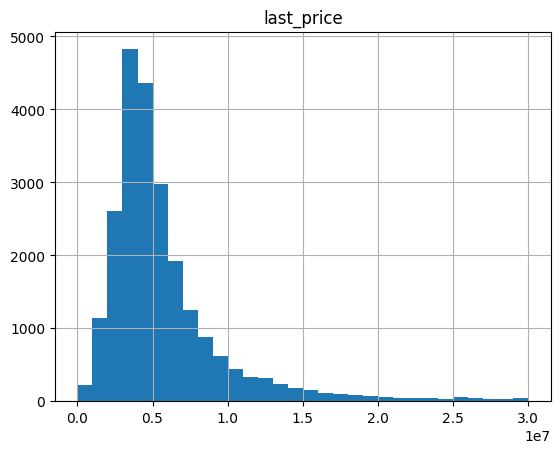

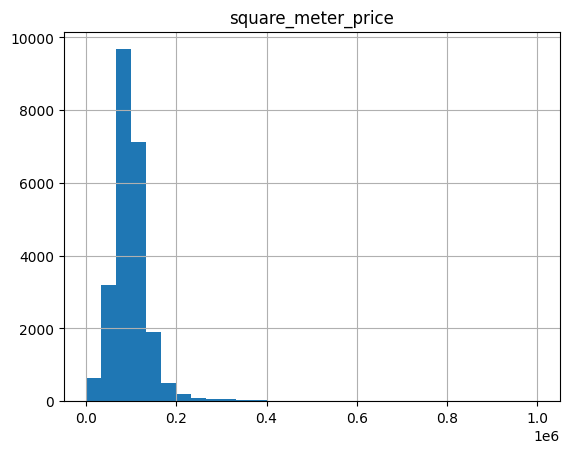

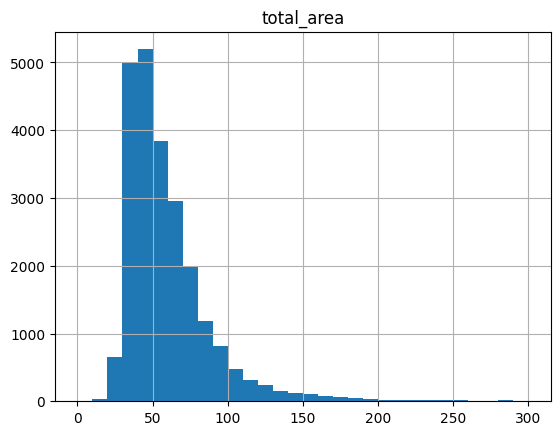

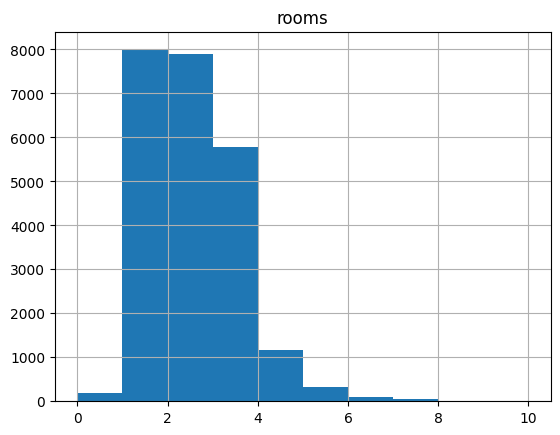

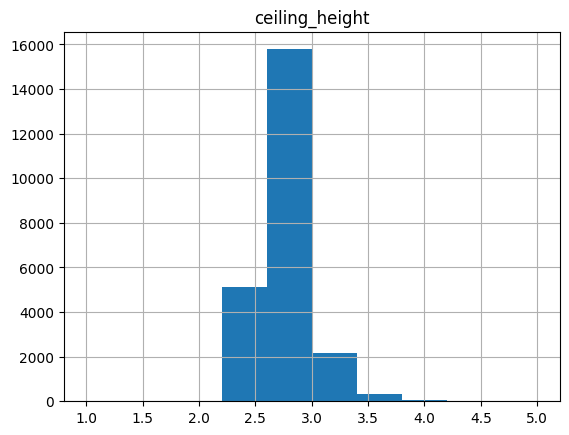

In [90]:
data.hist('last_price', bins = 30, range=(0, 30000000)) 
data.hist('square_meter_price', bins = 30, range=(0, 1000000)) 
data.hist('total_area', bins = 30, range=(0, 300))
data.hist('rooms', range=(0, 10)) 
data.hist('ceiling_height', range=(1, 5)) 


print('Статистика столбца last_price')
display(data['last_price'].describe())
print(60* '= ')

print('Статистика столбца square_meter_price')
display(data['square_meter_price'].describe())
print(60* '= ')

print('Статистика столбца total_area')
display(data['total_area'].describe())
print(60* '= ')

print('Статистика столбца rooms')
display(data['rooms'].describe())
print(60* '= ')

print('Статистика столбца ceiling_height')
display(data['ceiling_height'].describe())
print(60* '= ')

**Промежуточные выводы:**

- **Цена (last_price)** - На графике видно, что больше всего квартир стоимостью примерно 4 - 5 млн руб. Есть выдающиеся значения - минимальное всего 12 тыс, масксимальное 763 млн. Гистограмма обрезана в диапазоне до 30 млн, чтобы лучше оценить основную массу квартир.
- **Цена за кв.метр(square_meter_price)** - На графике видно, что больше всего квартир от 80 до 100тыс руб. Есть выдающиеся значения - минимальное всего 111 руб, масксимальное почти 2 млн.руб(!). Гистограмма обрезана в диапазоне до 10тыс.руб, чтобы лучше оценить основную массу квартир.
- **Площадь (total_area)** - Видим, что больше всего квартир площадью 30-50кв. Далее - график быстро спадает до 200кв. Но есть выдающиеся значения до 900кв.метров. Эти значения убраны из гистораммы, чтобы лучше оценить основную массу квартир.
- **Количество комнат (rooms)** - 1-комнатные и 2-ухкомнатные квартиры - самые частые в представленном датасете. 3ех комнатных немного меньше. 4 и больше комнат - в меньшенстве. Есть выбросы значений - минимально 0, максимально целых 19 комнат! Но так как таких квартир минимальное количество из гистограммы они исключены.
- **Высота потолков (ceiling_height)** - В большинстве квартир высота потолков от 2,5 до 3 метров. Есть выбросы значений - минимально 1метр, максимально 100м! В гистограмму попали квартиры до 5ти местров, так как остальных минимальное количество.

<div class="alert alert-info"> Изучаем <b>время продажи квартиры.</b> Строим гистограмму. </div>

Статистика столбца days_exposition


count   20394.000
mean      180.741
std       219.733
min         1.000
25%        45.000
50%        95.000
75%       231.000
max      1580.000
Name: days_exposition, dtype: float64

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 


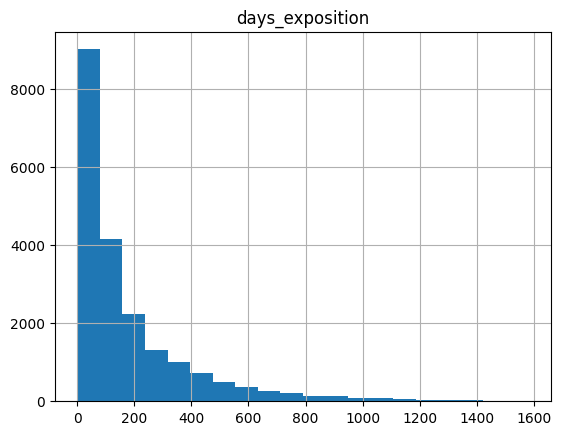

In [91]:
data.hist('days_exposition', bins = 20)

print('Статистика столбца days_exposition')
display(data['days_exposition'].describe())
print(60* '= ')

**Промежуточные выводы:**

- Минимально продажа квартиры занимает - 1 день. 
- Максимально - 1580 дней. 
- Медиана - 95 дней, а значит чаще всего квартиры продаются за 3 месяца. График это подтверждает.
- Среднее значение - 180 дней, намного выше медианы. Вероятно такая разница образовалась из-за небольшого количества квартир, которые висят в продаже годами.
- Быстрой можно считать продажу до 45 дней. у 25% всей базы получилось продать квартиру за этот срок.
- Долгой соответственно считаем продажу выше 230 дней. 75% всей базы продают квартиры быстрее.

<div class="alert alert-info"> <b>Убераем редкие и выбивающиеся значения.</b>  </div>

Изучим редкие значения в столбцах, которые нам потребуются для анализа, а именно: 
- last_price
- total_area
- rooms
- ceiling_height
- days_exposition

<div class="alert alert-info"> Рассмотрим еще раз значения столбца <b>last_price</b>. Построим диаграмму размаха </div>

Полная диаграмма размаха столбца last_price. Максимальные зачения доходят до 800 млн


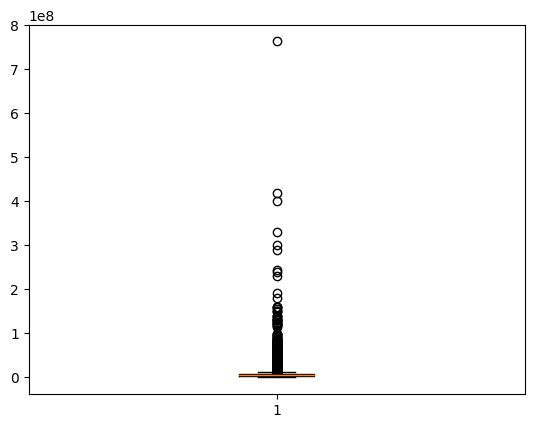

Диаграмма размаха столбца last_price со значениями до 250 млн


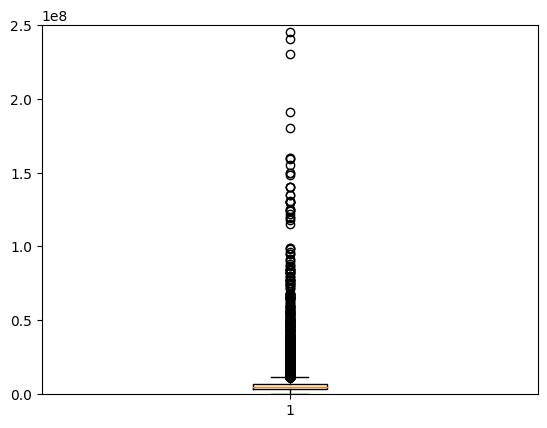

Диаграмма размаха столбца last_price со значениями до 40 млн


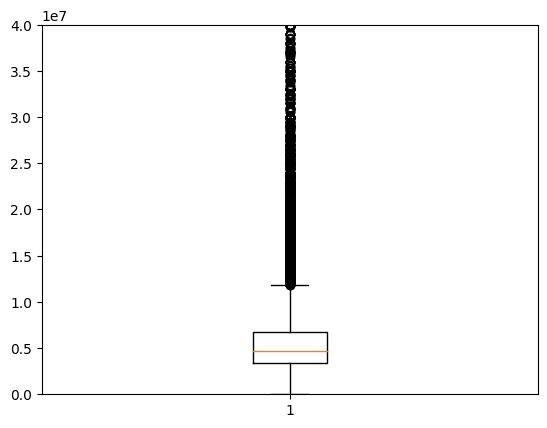

In [92]:
print('Полная диаграмма размаха столбца last_price. Максимальные зачения доходят до 800 млн')
plt.boxplot(data['last_price'])
plt.show()
print('Диаграмма размаха столбца last_price со значениями до 250 млн')
plt.boxplot(data['last_price'])
plt.ylim(0,250000000)
plt.show()
print('Диаграмма размаха столбца last_price со значениями до 40 млн')
plt.boxplot(data['last_price'])
plt.ylim(0,40000000)
plt.show()

**Промежуточный вывод** : На диаграммах видим, что большинство значений колеблется в диапазоне до 15 млн.руб(нижний график). Так же есть больше количество квартир в диапазоне до 100 млн(средний график). Все, что выше - одиночные варианты с огромной стоимостью, которые будет влиять на анализ. Он них избавимся ниже. Так же помним что минимальное значение у нас всего 12тыс. Всe значения до 500тыс - так же уберем из анализа, как выбросы.

In [93]:
data = data[data['last_price'] < 100000000]

<div class="alert alert-info"> Рассмотрим подробнее значения столбца <b>last_price</b> в диапазоне <b>до 3,4млн</b>(это значение первого квартиля), что бы отсечь выбросы с минимальными значениями. Построим гистограмму </div>

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

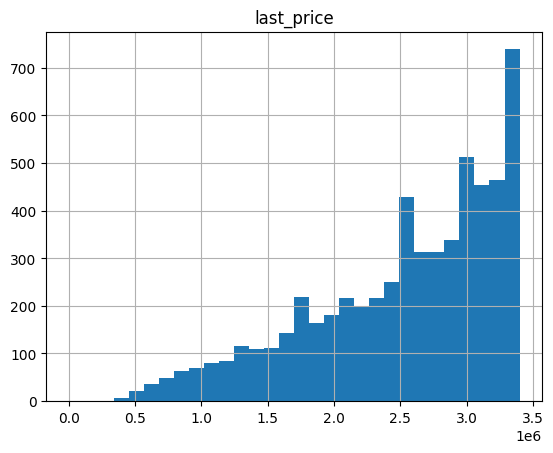

In [94]:
data.hist('last_price', bins = 30, range=(0, 3400000)) 

**Промежуточный вывод** : На диаграмме видим, что значений до 500тыс практически нет. Всё что есть так же уберем из анализа, как выбросы.

Диаграмма размаха столбца last_price после удаления выбросов


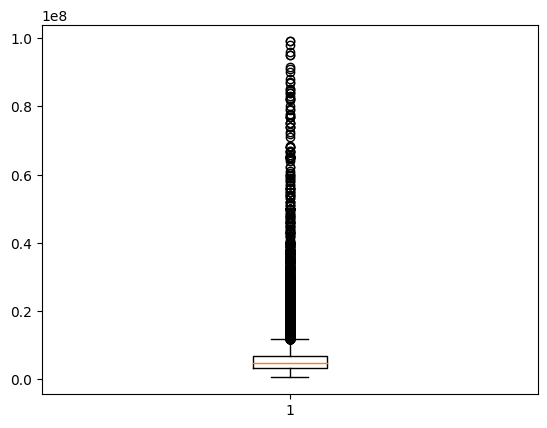

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
После удаление строк с пропусками в столбце last_price осталось 23510 из 23699
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 


In [95]:
data = data[data['last_price'] > 500000]

print('Диаграмма размаха столбца last_price после удаления выбросов')
plt.boxplot(data['last_price'])
plt.show()

print('= '*60)
print(f'После удаление строк с пропусками в столбце last_price осталось {len(data)} из 23699')
print('= '*60)

<div class="alert alert-info"> Рассмотрим так же подробнее значения столбца <b>square_meter_price</b>. </div>

Полная диаграмма размаха столбца square_meter_price. Максимальные зачения доходят до 800 тыс


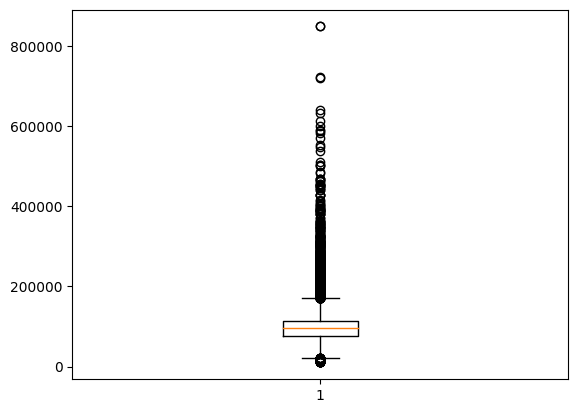

In [96]:
print('Полная диаграмма размаха столбца square_meter_price. Максимальные зачения доходят до 800 тыс')
plt.boxplot(data['square_meter_price'])
plt.show()


**Промежуточный вывод**:
    Не смотря на удаление выбросов в столбце last_price - в столбце square_meter_price всё еще есть выбивающиеся значения. Медианное значение кцены квадратного метра : 95тыс.руб. Все что выше 500тыс - считаем выбросами и убираем. 

Диаграмма размаха столбца square_meter_price после удаления выбросов


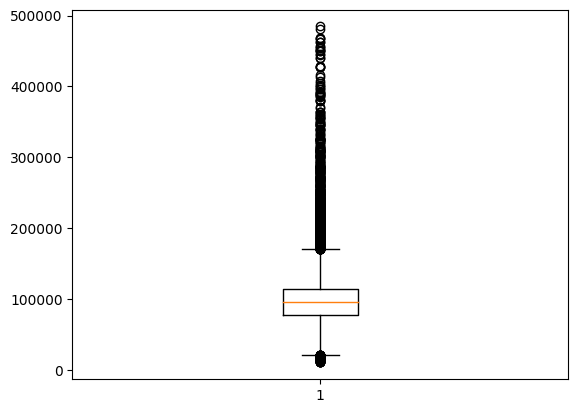

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
После удаление строк с пропусками, в столбце square_meter_price, осталось 23491 из 23699
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 


In [97]:
data = data[data['square_meter_price'] < 500000]

print('Диаграмма размаха столбца square_meter_price после удаления выбросов')
plt.boxplot(data['square_meter_price'])
plt.show()

print('= '*60)
print(f'После удаление строк с пропусками, в столбце square_meter_price, осталось {len(data)} из 23699')
print('= '*60)

<div class="alert alert-info"> Рассмотрим подробнее значения столбца <b>total_area</b>. Построим диаграмму размаха </div>

Полная диаграмма размаха столбца total_area.


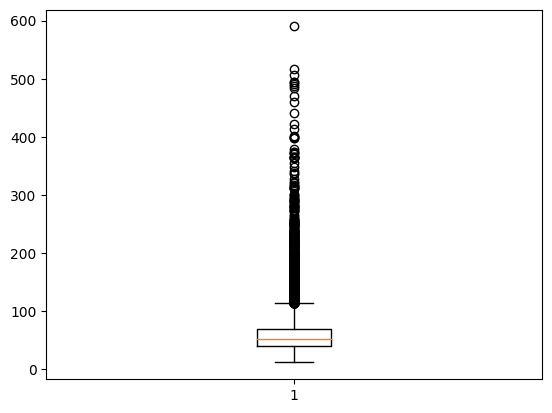

In [98]:
print('Полная диаграмма размаха столбца total_area.')
plt.boxplot(data['total_area'])
plt.show()

**Промежуточный вывод** : На диаграммах видим, что большинство значений колеблется в диапазоне до 125 метров. Так же есть больше количество квартир в диапазоне до 350 метров. Все, что выше - одиночные варианты, которые будет влиять на анализ. Он них избавимся ниже. 

In [99]:
data = data[data['total_area'] < 350]

<div class="alert alert-info"> Рассмотрим подробнее значения столбца <b>total_area</b> в диапазоне <b>до 40м</b>(это значение первого квартиля), что бы отсечь выбросы с минимальными значениями. Построим гистограмму </div>

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

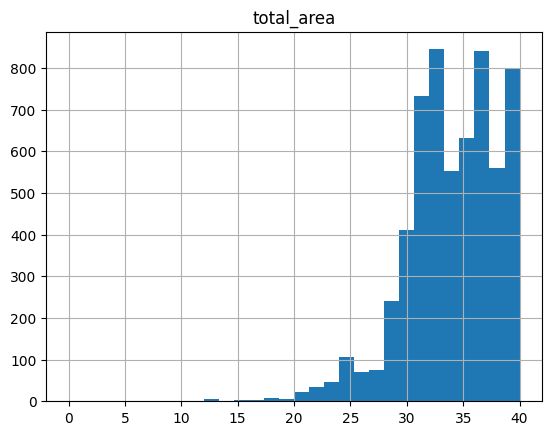

In [100]:
data.hist('total_area', bins = 30, range=(0, 40)) 

**Промежуточный вывод** : На диаграмме видим, что значений до 20м практически нет. Всё что есть так же уберем из анализа, как выбросы.

Диаграмма размаха столбца total_area после удаления выбросов


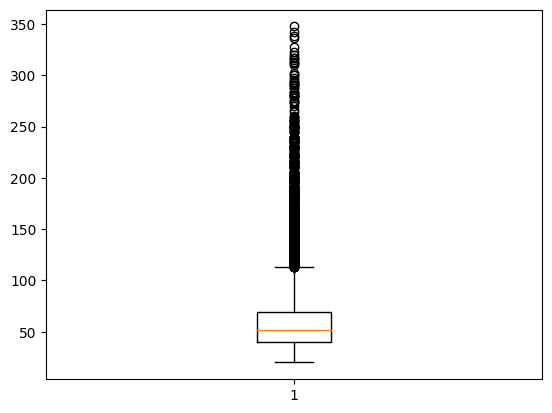

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
После удаление строк с пропусками в столбце total_area осталось 23426 из 23699
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 


In [101]:
data = data[data['total_area'] > 20]

print('Диаграмма размаха столбца total_area после удаления выбросов')
plt.boxplot(data['total_area'])
plt.show()

print('= '*60)
print(f'После удаление строк с пропусками в столбце total_area осталось {len(data)} из 23699')
print('= '*60)

<div class="alert alert-info"> Рассмотрим подробнее значения столбца <b>rooms</b>. Построим диаграмму размаха </div>

Полная диаграмма размаха столбца rooms.


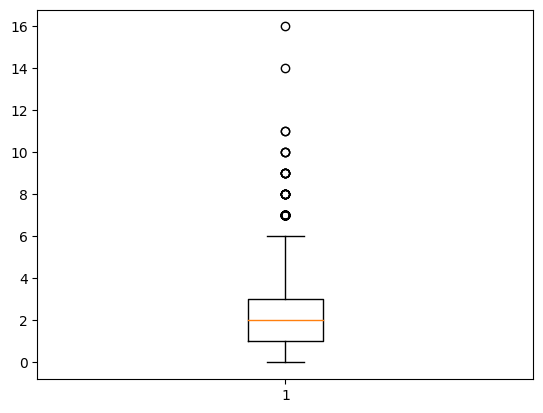

In [102]:
print('Полная диаграмма размаха столбца rooms.')
plt.boxplot(data['rooms'])
plt.show()

**Промежуточный вывод** : На диаграммах видим, что большинство значений колеблется в диапазоне до 6ти квартир. Так же есть небольшое количество квартир до 18 комнат. Не считаю эти цифры выбросами. Убирать их не будем. Но мы помним, что есть квартиры со значениями комнат - 0. Их не очень много учитывая график, что мы составляли в 4ом пункте проекта. Считаем их за выбросы. От них избавимся ниже. 

Гистограмма столбца rooms после удаления выбросов со значением 0
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
После удаление строк с пропусками в столбце rooms осталось 23243 из 23699
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 


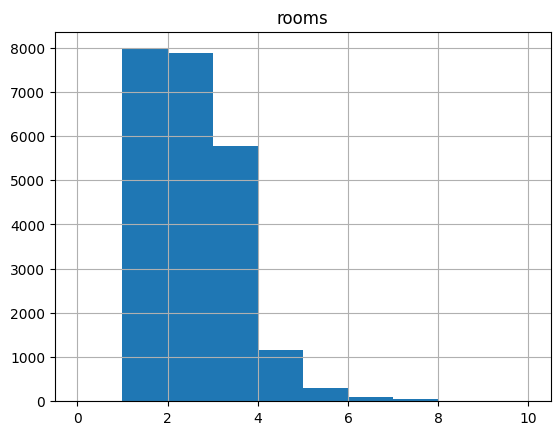

In [103]:
data = data[(data['rooms'] > 0)]

print('Гистограмма столбца rooms после удаления выбросов со значением 0')
data.hist('rooms', range=(0, 10)) 


print('= '*60)
print(f'После удаление строк с пропусками в столбце rooms осталось {len(data)} из 23699')
print('= '*60)

<div class="alert alert-info"> Рассмотрим подробнее значения столбца <b>ceiling_height</b>. Построим диаграмму размаха</div>

Полная диаграмма размаха столбца ceiling_height


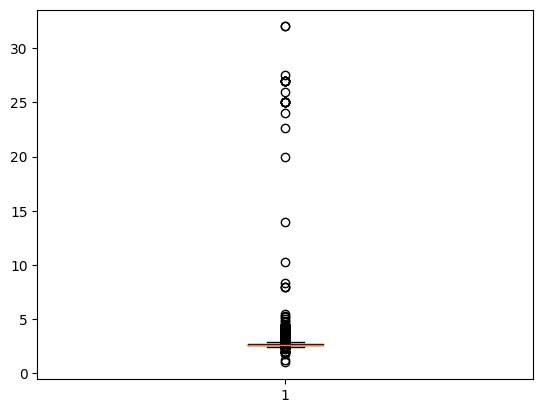

Диаграмма размаха столбца ceiling_height. Диапазон до 30 метров


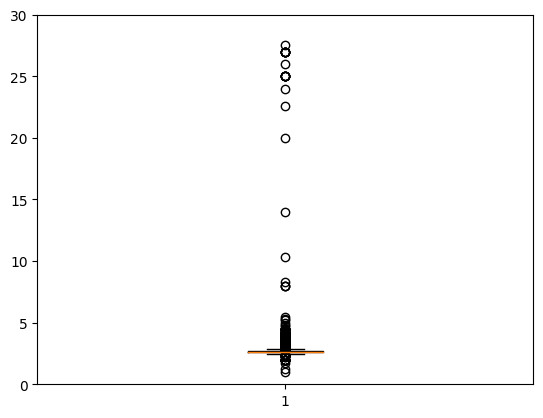

Диаграмма размаха столбца ceiling_height. Диапазон до 7 метров


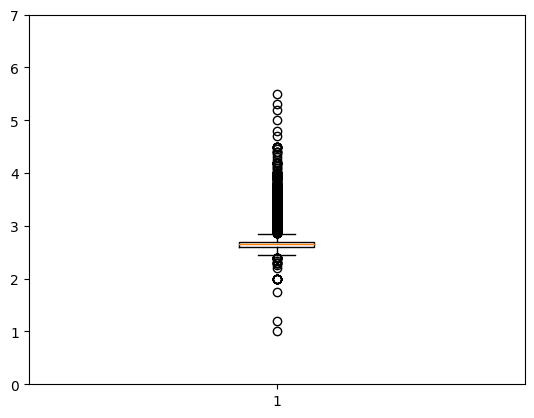

In [104]:
print('Полная диаграмма размаха столбца ceiling_height')
plt.boxplot(data['ceiling_height'])
plt.show()

print('Диаграмма размаха столбца ceiling_height. Диапазон до 30 метров')
plt.boxplot(data['ceiling_height'])
plt.ylim(0,30)
plt.show()

print('Диаграмма размаха столбца ceiling_height. Диапазон до 7 метров')
plt.boxplot(data['ceiling_height'])
plt.ylim(0,7)
plt.show()


**Промежуточный вывод** : На диаграмме видим, что большинство значений колеблется в диапазоне до 6 метров. Есть выбросы до 100м. Все что выше 6 метров - редкие значения и выбросы. Удалим их ниже. Так же избавимся от значений ниже 1,5 метра.

Полная диаграмма размаха столбца ceiling_height после удаления выбросов


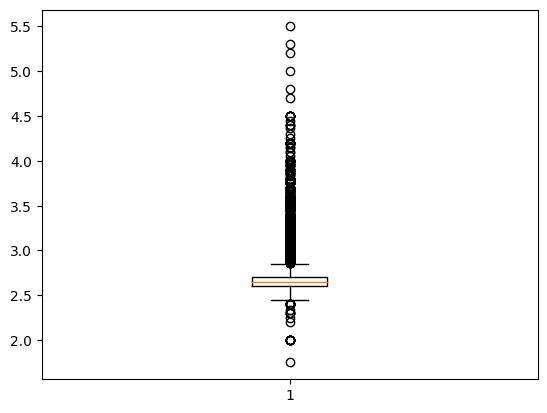

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
После удаление строк с пропусками в столбце ceiling_height осталось 23214 из 23699
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 


In [105]:
data = data[(data['ceiling_height'] < 6) & (data['ceiling_height'] > 1.5)]

print('Полная диаграмма размаха столбца ceiling_height после удаления выбросов')
plt.boxplot(data['ceiling_height'])
plt.show()

print('= '*60)
print(f'После удаление строк с пропусками в столбце ceiling_height осталось {len(data)} из 23699')
print('= '*60)

<div class="alert alert-info"> Рассмотрим подробнее значения столбца <b>days_exposition</b>. Построим гистограмму </div>

In [106]:
#print(data.pivot_table(columns = 'year_exposition', values = 'total_area', aggfunc = 'count'))
#print(data[data['days_exposition'].isnull()].pivot_table(columns = 'year_exposition', values = 'total_area', aggfunc = 'count'))

Гистограмма столбца days_exposition.


array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

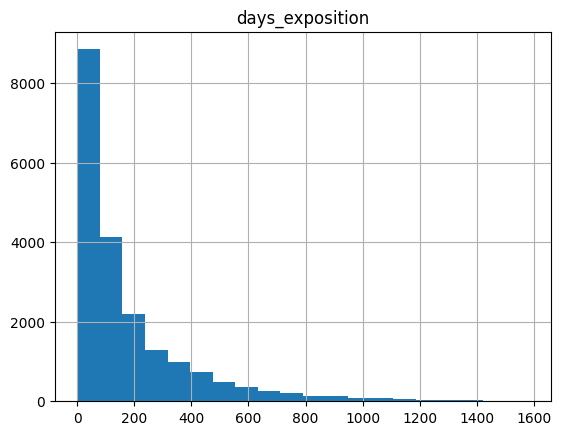

In [107]:
print('Гистограмма столбца days_exposition.')
data.hist('days_exposition', bins = 20)

**Промежуточный вывод** : На диаграмме и гистограмме видим, что большинство значений колеблется в диапазоне до 1000 дней. Все что выше - редкие значения и выбросы. Удалим их ниже. 

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
После удаление строк с выбросами в столбце days_exposition осталось 22941 из 23699
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Гистограмма столбца days_exposition после удаления выбросов


array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

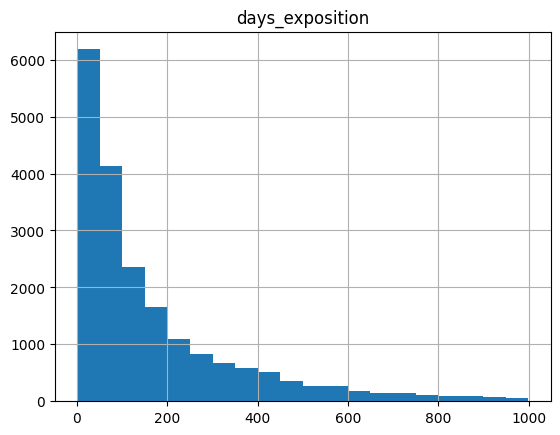

In [108]:
data = data.query('days_exposition < 1000 or days_exposition!=days_exposition')

print('= '*60)
print(f'После удаление строк с выбросами в столбце days_exposition осталось {len(data)} из 23699')
print('= '*60)

print('Гистограмма столбца days_exposition после удаления выбросов')
data.hist('days_exposition', bins = 20)

<div class="alert alert-info"> <b> Итоговая информация по выбросам: </b> </div>

In [109]:
print('= '*60)
print(f'После удаление строк с пропусками и выбросов в датасете осталось {len(data)} из 23699 строк')
print('= '*60)
print(f'Было удалено {23699 - len(data)} строк. Это {int((23699 - len(data)) / 23699 *100)}% от всего датасета')
print('= '*60)

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
После удаление строк с пропусками и выбросов в датасете осталось 22941 из 23699 строк
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Было удалено 758 строк. Это 3% от всего датасета
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 


<div class="alert alert-info">  Анализ, зависимости <b>общей цены квартиры</b> от площади, числа комнат, удалённости от центра. Считаем корреляцию </div>

,last_price,total_area,rooms,city_сenters_nearest
last_price,1.000,0.769,0.474,-0.307
total_area,0.769,1.000,0.787,-0.243
rooms,0.474,0.787,1.000,-0.183
city_сenters_nearest,-0.307,-0.243,-0.183,1.000


Зависимость цены от общей площади


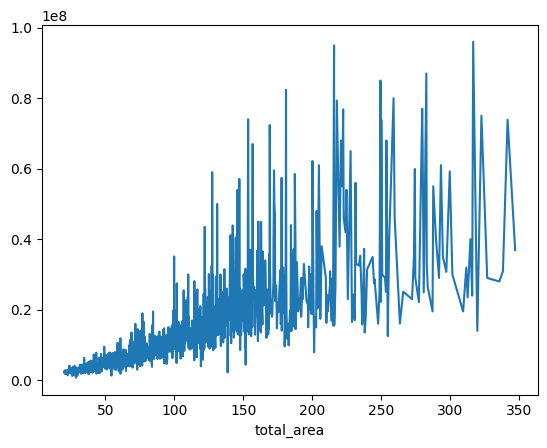

Зависимость цены от количества комнат


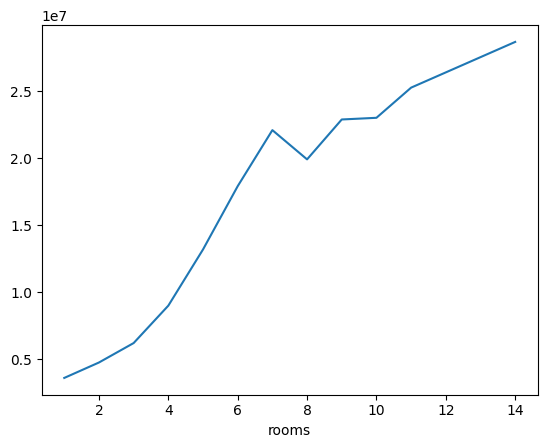

Зависимость цены от расстояния от центра города


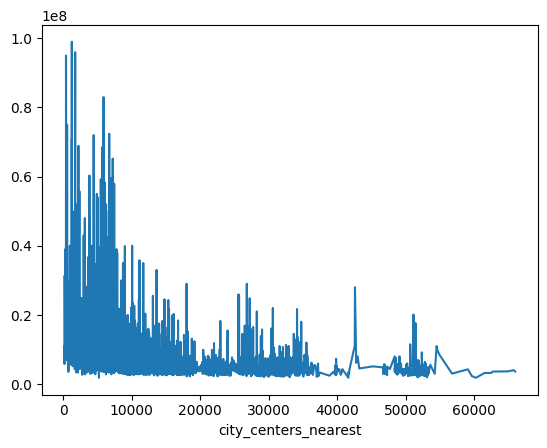

Матрица рассеяния


array([[<AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='total_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='rooms', ylabel='last_price'>,
        <AxesSubplot:xlabel='city_сenters_nearest', ylabel='last_price'>],
       [<AxesSubplot:xlabel='last_price', ylabel='total_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='total_area'>,
        <AxesSubplot:xlabel='city_сenters_nearest', ylabel='total_area'>],
       [<AxesSubplot:xlabel='last_price', ylabel='rooms'>,
        <AxesSubplot:xlabel='total_area', ylabel='rooms'>,
        <AxesSubplot:xlabel='rooms', ylabel='rooms'>,
        <AxesSubplot:xlabel='city_сenters_nearest', ylabel='rooms'>],
       [<AxesSubplot:xlabel='last_price', ylabel='city_сenters_nearest'>,
        <AxesSubplot:xlabel='total_area', ylabel='city_сenters_nearest'>,
        <AxesSubplot:xlabel='rooms', ylabel='city_сenters_nearest'>,
        <AxesSubp

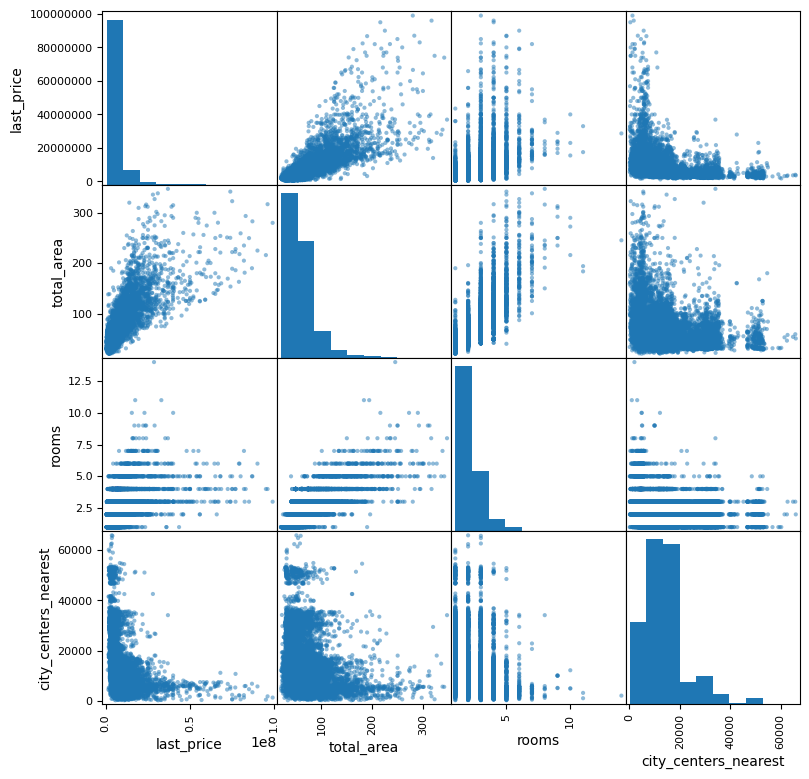

In [110]:
impact_on_price = data[['last_price','total_area','rooms','city_сenters_nearest']]
display(impact_on_price.corr())

print('Зависимость цены от общей площади')
impact_on_price.groupby('total_area')['last_price'].median().plot()
plt.show()
print('Зависимость цены от количества комнат')
impact_on_price.groupby('rooms')['last_price'].median().plot()
plt.show()
print('Зависимость цены от расстояния от центра города')
impact_on_price.groupby('city_сenters_nearest')['last_price'].median().plot()
plt.show()

print('Матрица рассеяния')
pd.plotting.scatter_matrix(impact_on_price, figsize=(9, 9)) 

**Вывод:**
- Обнаружена высокая линейная зависимости цены квартиры от общей площади (Показатель корреляции : 0,75). Особенно высокая корреляция у квартир до 100 метров, что видно из первого графика.
- Так же есть достаточно высокая линейная зависимости цены квартиры от количества комнат (Показатель корреляции : 0,46). На графике так же прослежимается линейная зависимость.
- Расстояние от центра города влияет на цену квартиры меньше, чем предыдущие показатели, но зависимость также прослеживается. (Показатель обратной корреляции : -0,30). На диаграмме виден большой всплеск цены на маленьких расстояниях до 10км.

**Намного важнее найти какие показатели влияют на цену квадратного метра, а не на общую стоимость квартиры, поэтому ниже рассмотрим зависимость цены квадратного метра от площади, числа комнат, удалённости от центра**

<div class="alert alert-info">  Анализ, зависимости <b>цены квадратного метра</b> от площади, числа комнат, удалённости от центра. Считаем корреляцию </div>

,square_meter_price,total_area,rooms,city_сenters_nearest
square_meter_price,1.000,0.262,0.015,-0.373
total_area,0.262,1.000,0.787,-0.243
rooms,0.015,0.787,1.000,-0.183
city_сenters_nearest,-0.373,-0.243,-0.183,1.000


Зависимость цены квадратного метра от общей площади


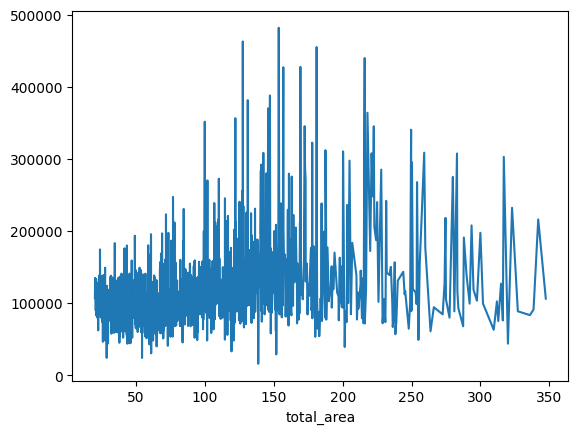

Зависимость цены квадратного метра от количества комнат


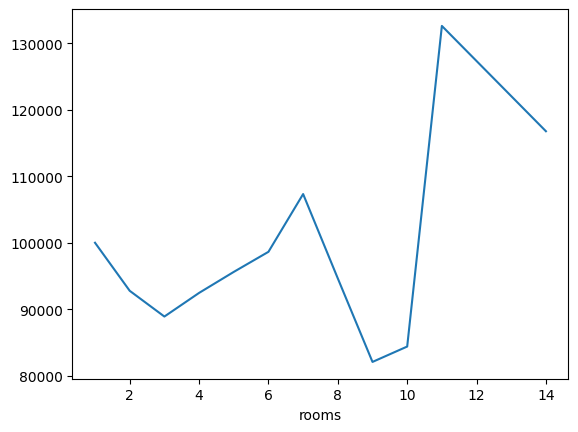

Зависимость цены квадратного метра от расстояния от центра города


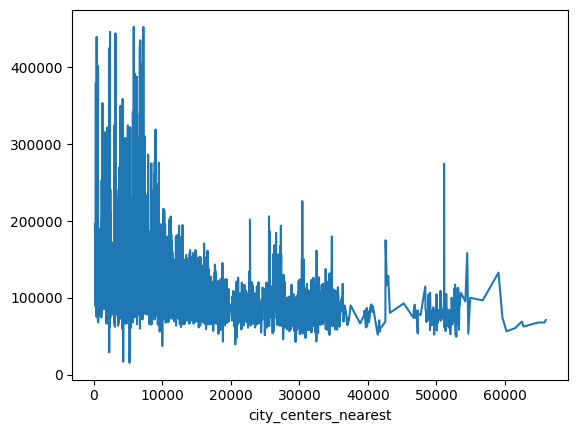

Матрица рассеяния


array([[<AxesSubplot:xlabel='square_meter_price', ylabel='square_meter_price'>,
        <AxesSubplot:xlabel='total_area', ylabel='square_meter_price'>,
        <AxesSubplot:xlabel='rooms', ylabel='square_meter_price'>,
        <AxesSubplot:xlabel='city_сenters_nearest', ylabel='square_meter_price'>],
       [<AxesSubplot:xlabel='square_meter_price', ylabel='total_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='total_area'>,
        <AxesSubplot:xlabel='city_сenters_nearest', ylabel='total_area'>],
       [<AxesSubplot:xlabel='square_meter_price', ylabel='rooms'>,
        <AxesSubplot:xlabel='total_area', ylabel='rooms'>,
        <AxesSubplot:xlabel='rooms', ylabel='rooms'>,
        <AxesSubplot:xlabel='city_сenters_nearest', ylabel='rooms'>],
       [<AxesSubplot:xlabel='square_meter_price', ylabel='city_сenters_nearest'>,
        <AxesSubplot:xlabel='total_area', ylabel='city_сenters_nearest'>,
        <AxesSubplot:x

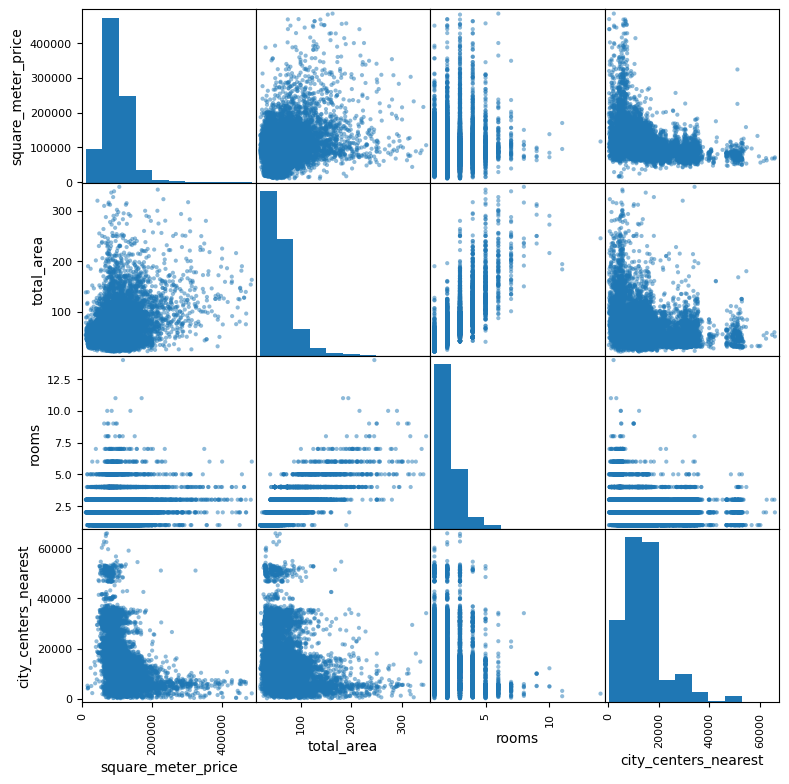

In [111]:
impact_on_price = data[['square_meter_price','total_area','rooms','city_сenters_nearest']]
display(impact_on_price.corr())

print('Зависимость цены квадратного метра от общей площади')
impact_on_price.groupby('total_area')['square_meter_price'].median().plot()
plt.show()
print('Зависимость цены квадратного метра от количества комнат')
impact_on_price.groupby('rooms')['square_meter_price'].median().plot()
plt.show()
print('Зависимость цены квадратного метра от расстояния от центра города')
impact_on_price.groupby('city_сenters_nearest')['square_meter_price'].median().plot()
plt.show()

print('Матрица рассеяния')
pd.plotting.scatter_matrix(impact_on_price, figsize=(9, 9)) 

**Вывод**

- Есть странная зависимость цены кв.м от площади. Показатель корреляции 0,26. Тоесть цена за квадрат растет вместе с площадью. Это не типично для рынка недвижимости. Судя по графику в базе большое количество элитных больших квартир от 100 до 250 метров и они влияют на анализ.
- Зависимости цены кв.м от количества комнат не найдено. График это также подтверждает.
- Есть зависимось цены кв.м от расстояния до центра. Показатель корреляции -0,36(выше чем у last_price и более точный на мой взгляд). На графике так же видно уменьшение цены при увеличении расстояния.

<div class="alert alert-info"> Анализ, зависимости <b>цены</b> от того, <b>на каком этаже расположена квартира: первом, последнем или другом.</b> Для более точного анализа возьмем <b>цену квадратного метра</b>.</div>

Корреляция цены от категории этажа


,square_meter_price,floor_category
square_meter_price,1.000,0.182
floor_category,0.182,1.000


= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Категории:
    0 - первый этаж
    1 - последний этаж
    2 - другой
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Медианное значение цен на квартиры в разных категориях этажности


<AxesSubplot:xlabel='floor_category'>

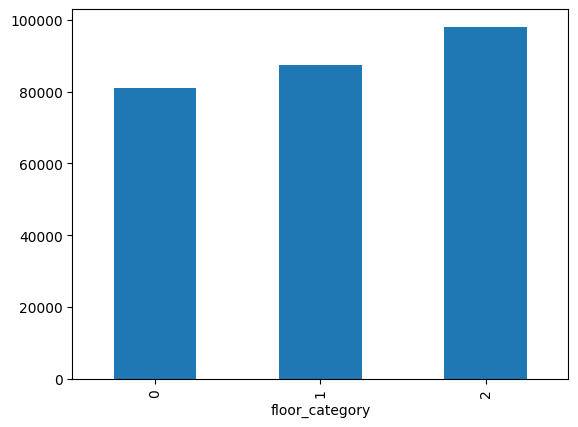

In [112]:
impact_on_price_flour = data[['square_meter_price','floor_category']]
print('Корреляция цены от категории этажа')
display(impact_on_price_flour.corr())

print(60* '= ')
print('Категории:')
print('    0 - первый этаж')
print('    1 - последний этаж')
print('    2 - другой')
print(60* '= ')

print('Медианное значение цен на квартиры в разных категориях этажности')
impact_on_price_flour.groupby('floor_category')['square_meter_price'].median().plot(kind='bar')


**Вывод**:
- Найдена невысокая но логичная зависимость цены кв.м от того на каком этаже находится квартира: на первом, последнем или любом другом. Корреляция - 0,18. 
- На столбчатой диаграмме так же видна нэта зависимость: квартиры на 1ом этаже самые дешевые, на последнем - дороже, на любом этаже кроме первого и последнего еще дороже. Возможно есть влияние других факторов.

<div class="alert alert-info"> Анализ зависимости <b>цены от даты размещения</b>: дня недели, месяца и года. Для более точного анализа возьмем цену квадратного метра.</div>

Корреляция цены от даты размещения обьявления


,last_price,day_of_week_exposition,month_exposition,year_exposition
last_price,1.000,-0.008,0.002,-0.045
day_of_week_exposition,-0.008,1.000,0.010,-0.006
month_exposition,0.002,0.010,1.000,-0.277
year_exposition,-0.045,-0.006,-0.277,1.000


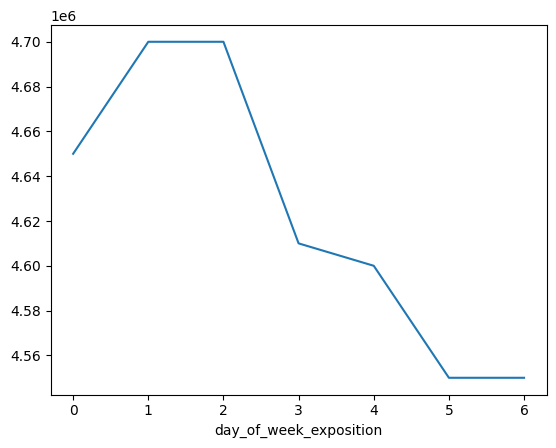

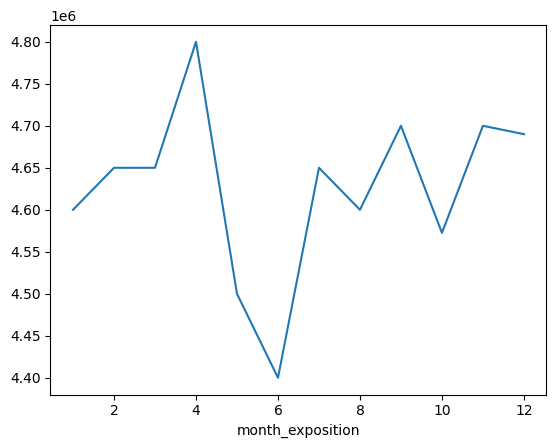

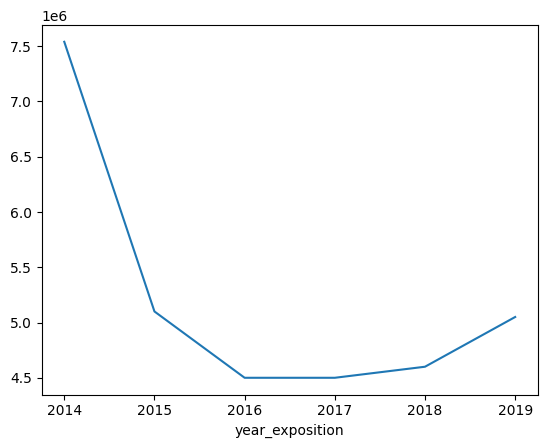

In [113]:
impact_on_price_data = data[['last_price','day_of_week_exposition','month_exposition','year_exposition']]
print('Корреляция цены от даты размещения обьявления')
display(impact_on_price_data.corr())

impact_on_price_data.groupby('day_of_week_exposition')['last_price'].median().plot()
plt.show()
impact_on_price_data.groupby('month_exposition')['last_price'].median().plot()
plt.show()
impact_on_price_data.groupby('year_exposition')['last_price'].median().plot()
plt.show()

**Вывод**:
- Зависимости между ценой и днем недели не выявлено. На графике есть минимальное изменение значений в диапазоне от 4,56 млн до 4,70 млн, но они очень малы, чтобы назвать это зависимостью.
- Зависимости между ценой и месяцем, когда было выложено обьявление также не выявлено. На графике есть небольшой разброс значений в диапазоне от 4,4 млн до 4,8 млн, но они очень малы, чтобы назвать это зависимостью.
- Зависимости между общей ценой и годом нет.  **Но на графике явно видно снижение общей стоимости квартир в 2016му году. У этого может быть несколько причин: как вариант - Появление на рынке большого количества маленьких квартир.**

**Для того чтобы проверить последнюю гипотизу посчитаем корреляцию цены на кв.м и дня недели, месяца и года когда было размещено обьявление.**

In [114]:
impact_on_price_meter_data = data[['square_meter_price','day_of_week_exposition','month_exposition','year_exposition']]
print('Корреляция цены от даты размещения обьявления')
display(impact_on_price_data.corr())

Корреляция цены от даты размещения обьявления


,last_price,day_of_week_exposition,month_exposition,year_exposition
last_price,1.000,-0.008,0.002,-0.045
day_of_week_exposition,-0.008,1.000,0.010,-0.006
month_exposition,0.002,0.010,1.000,-0.277
year_exposition,-0.045,-0.006,-0.277,1.000


**Вывод (дополнение):**
    Гипотиза подтвердилась - зависимости цены квадратного метра от года, когда было выложено обьявление, **не найдено**. Это значит, что в 2016-2017 годах было выставлено на продажу большое количество маленьких квартир со средней ценой квадратного метра. Из-за этого медианная общая цена квартир просела в эти годы.

<div class="alert alert-info"> Выделяем 10 населённых пунктов с наибольшим числом объявлений. Считаем среднюю цену квадратного метра в этих населённых пунктах. </div>

In [115]:
pivot_square_meter_price = data.pivot_table(index = 'locality_name', values = 'square_meter_price', aggfunc=['count', 'mean']).sort_values(by=('count', 'square_meter_price'), ascending = False).head(10)
print(pivot_square_meter_price) 

                             count               mean
                square_meter_price square_meter_price
locality_name                                        
санкт-петербург              15223         112819.316
мурино                         552          85607.584
кудрово                        443          95073.707
шушары                         431          78211.958
всеволожск                     386          67211.534
пушкин                         359         103188.857
колпино                        336          75371.698
парголово                      322          90216.451
гатчина                        306          68757.679
выборг                         236          58121.266


<div class="alert alert-info"> Населённые пункты с самой высокой и низкой стоимостью жилья. </div>

In [116]:
print('Самая высокая стоимость жилья')
print(pivot_square_meter_price[pivot_square_meter_price['mean']['square_meter_price'] == pivot_square_meter_price['mean']['square_meter_price'].max()])
print(60* '= ')
print('Самая низкая стоимость жилья')
print(pivot_square_meter_price[pivot_square_meter_price['mean']['square_meter_price'] == pivot_square_meter_price['mean']['square_meter_price'].min()])
print(60* '= ')

Самая высокая стоимость жилья
                             count               mean
                square_meter_price square_meter_price
locality_name                                        
санкт-петербург              15223         112819.316
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Самая низкая стоимость жилья
                           count               mean
              square_meter_price square_meter_price
locality_name                                      
выборг                       236          58121.266
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 


<div class="alert alert-info">  <b> Детальный анализ квартир в Санкт-Петербурге.</b> Делаем срез данных по locality_name. Добавляем столбец с расстоянием до центра в километрах (distance_km). </div>

In [117]:
data_sankt_peter = data[data['locality_name'] == 'санкт-петербург']
data_sankt_peter = data_sankt_peter.dropna(subset = ['city_сenters_nearest'])

data_sankt_peter['distance_km'] = (data_sankt_peter['city_сenters_nearest'] / 1000).astype('int')

<div class="alert alert-info">  Добавляем столбец где считаем "цену" для каждого километра (impact_price_per_kilometer). Строим график, на котором видно как цена зависит от удалённости от центра. </div>

<AxesSubplot:xlabel='distance_km'>

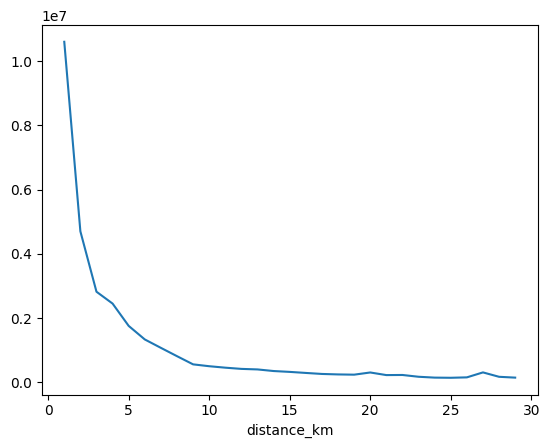

In [118]:
data_sankt_peter['impact_price_per_kilometer'] = data_sankt_peter['last_price']/data_sankt_peter['distance_km']

data_sankt_peter.groupby('distance_km')['impact_price_per_kilometer'].median().plot()

**Вывод:** На графике видим, что самые высокие цены на квартиры в радиусе 7-8км от центра города. Будем считать это центральной зоной.

<div class="alert alert-info">  <b>Выделяем сегмент квартир в центре Санкт-Петербурга</b> (до 8 км от центра). Для данного среза анализируем следующие параметры: площадь, цена, число комнат, высота потолков.  </div>

Статистика столбца last_price


count       3518.000
mean    12459153.827
std     10978120.978
min      1600000.000
25%      6500000.000
50%      8990000.000
75%     13678000.000
max     99000000.000
Name: last_price, dtype: float64

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Статистика столбца square_meter_price


count     3518.000
mean    137010.439
std      59369.711
min      15345.269
25%      99769.111
50%     122512.431
75%     153217.227
max     484662.577
Name: square_meter_price, dtype: float64

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Статистика столбца total_area


count   3518.000
mean      87.865
std       46.492
min       20.300
25%       55.625
50%       76.910
75%      106.000
max      342.000
Name: total_area, dtype: float64

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Статистика столбца rooms


count   3518.000
mean       2.773
std        1.334
min        1.000
25%        2.000
50%        3.000
75%        3.000
max       14.000
Name: rooms, dtype: float64

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Статистика столбца ceiling_height


count   3518.000
mean       2.920
std        0.351
min        2.000
25%        2.650
50%        2.800
75%        3.100
max        5.500
Name: ceiling_height, dtype: float64

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 


array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

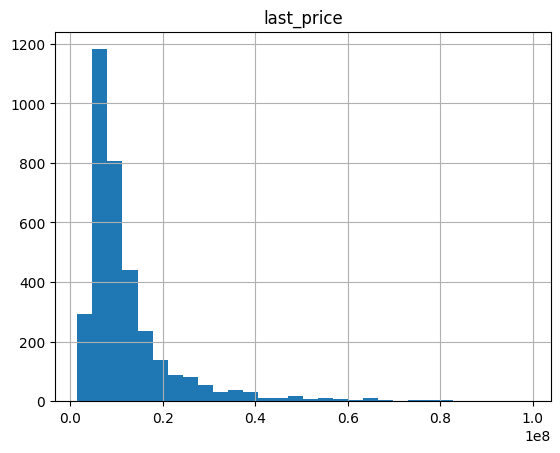

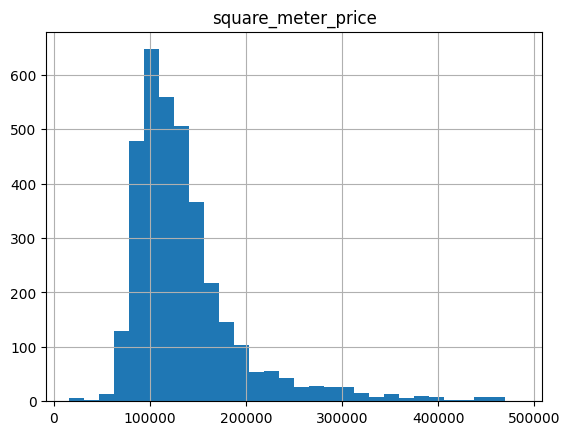

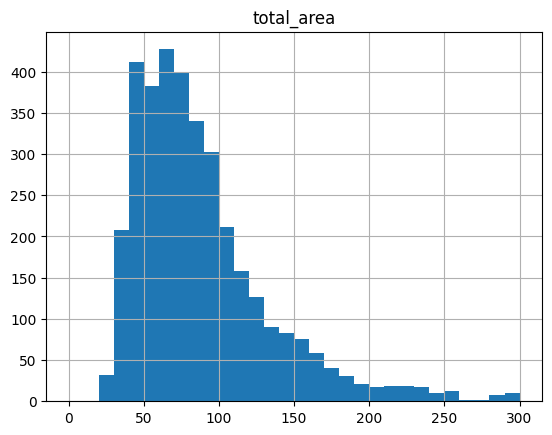

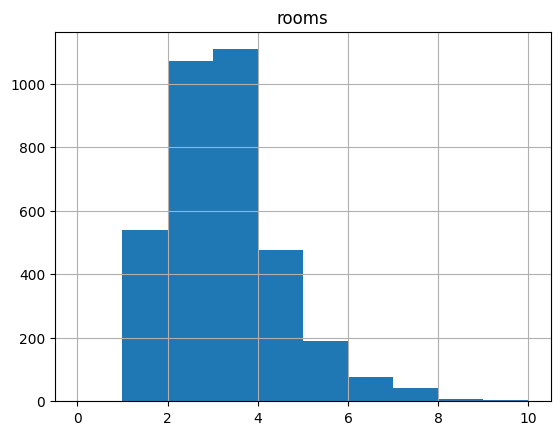

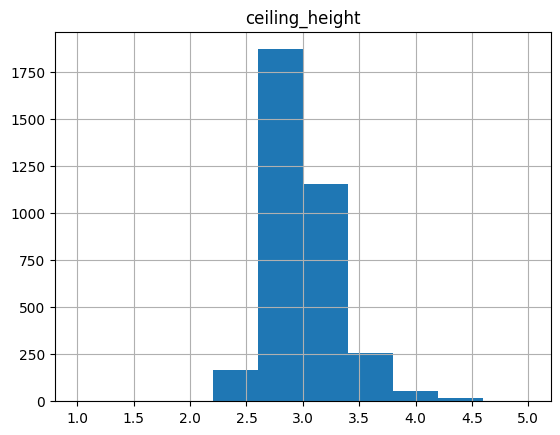

In [119]:
data_center = data_sankt_peter = data_sankt_peter[data_sankt_peter['distance_km'] < 8]

print('Статистика столбца last_price')
display(data_center['last_price'].describe())
print(60* '= ')

print('Статистика столбца square_meter_price')
display(data_center['square_meter_price'].describe())
print(60* '= ')

print('Статистика столбца total_area')
display(data_center['total_area'].describe())
print(60* '= ')

print('Статистика столбца rooms')
display(data_center['rooms'].describe())
print(60* '= ')

print('Статистика столбца ceiling_height')
display(data_center['ceiling_height'].describe())
print(60* '= ')

data_center.hist('last_price', bins = 30) 
data_center.hist('square_meter_price', bins = 30) 
data_center.hist('total_area', bins = 30, range=(0, 300))
data_center.hist('rooms', range=(0, 10)) 
data_center.hist('ceiling_height', range=(1, 5)) 

**Промежуточный вывод:** Данные немного отличаются от общего датасета. Формы графиков похожи на те, что были в общем датасете, но практически все графики немного сдвинулись в правую сторону. Цена стала выше, комнат больше, пололки выше. Подробнее рассмотрим ниже. 

<div class="alert alert-info">  <b>Сравним показатели медианы </b> по тем же параментам: <b>площадь, цена, число комнат, высота потолков.</b> для общего дата сета и для центра Санкт-Петербурга. </div>

In [120]:
print(f'Медиана по столбцу last_price во всем датасете = {int(data["last_price"].median())}. В центре Санкт-Петербурга = {int(data_center["last_price"].median())}')
print(60* '= ')

print(f'Медиана по столбцу square_meter_price во всем датасете = {int(data["square_meter_price"].median())}. В центре Санкт-Петербурга = {int(data_center["square_meter_price"].median())}')
print(60* '= ')

print(f'Медиана по столбцу total_area во всем датасете = {int(data["total_area"].median())}. В центре Санкт-Петербурга = {int(data_center["total_area"].median())}')
print(60* '= ')

print(f'Медиана по столбцу rooms во всем датасете = {data["rooms"].median()}. В центре Санкт-Петербурга = {data_center["rooms"].median()}')
print(60* '= ')

print(f'Медиана по столбцу ceiling_height во всем датасете = {data["ceiling_height"].median()}. В центре Санкт-Петербурга = {data_center["ceiling_height"].median()}')
print(60* '= ')

Медиана по столбцу last_price во всем датасете = 4650000. В центре Санкт-Петербурга = 8990000
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Медиана по столбцу square_meter_price во всем датасете = 94786. В центре Санкт-Петербурга = 122512
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Медиана по столбцу total_area во всем датасете = 52. В центре Санкт-Петербурга = 76
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Медиана по столбцу rooms во всем датасете = 2.0. В центре Санкт-Петербурга = 3.0
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Медиана по столбцу ceiling_height во всем датасете = 2.65. В центре Санкт-Петербурга = 2.8
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = =

**Вывод:**
- **Медиана цены квартиры в центре Санкт-Петербурга выше, чем в среднем по датасету практически в 2 раза**. (9 млн.руб против 4,6 млн.руб во всем дата сете). Это логично. Квртиры в центре любого города предполагаемо будут стоить дороже, чем отдаленные районы или пригороды.
- **Цена квадратного метра так же выше, но разница уже не такая весомая** (122тыс.руб в центре Питера против 95тыс.руб во всем датасете)
- **Площадь квартир в центре Санкт-Петербурга намного выше, чем в среднем по всему датасету** (76кв против 52кв). Это обьясняет такую большую разницу в  разницу last_price.
- **Количество комнат в центра Санкт-Петербурга так же больше** (3 комнаты, против 2 - в общем датасете). Это обьясняется большой площадью квартир в этой зоне.
- **Потолки в центре Санкт-Петербурга выше, чем в общем датасете** (2.8м против 2,65м). Это обьясняется старой застройкой с высокими пололками.

<div class="alert alert-info">  Анализ, зависимости <b>общей цены квартиры</b> от площади, числа комнат, удалённости от центра для квартир в центре Санкт-Петербурга.</div>

,last_price,total_area,rooms,city_сenters_nearest
last_price,1.000,0.722,0.415,-0.051
total_area,0.722,1.000,0.782,-0.150
rooms,0.415,0.782,1.000,-0.201
city_сenters_nearest,-0.051,-0.150,-0.201,1.000


Зависимость цены от общей площади


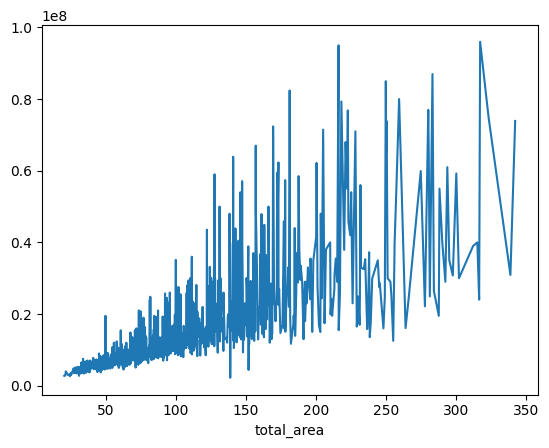

Зависимость цены от количества комнат


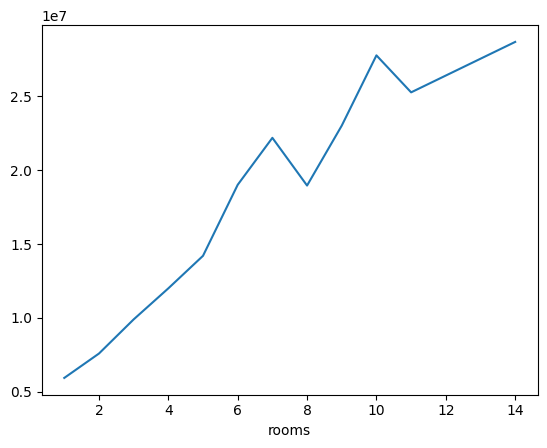

Зависимость цены от расстояния от центра города


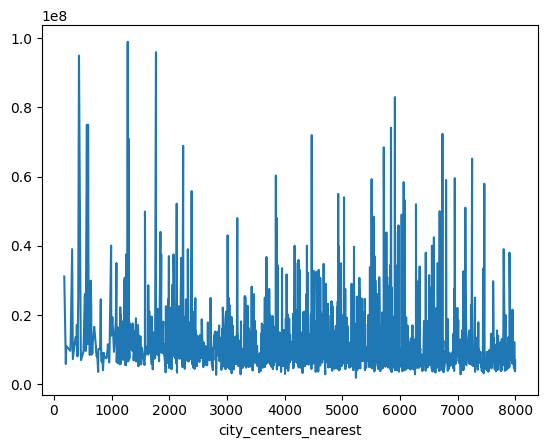

Матрица рассеяния


array([[<AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='total_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='rooms', ylabel='last_price'>,
        <AxesSubplot:xlabel='city_сenters_nearest', ylabel='last_price'>],
       [<AxesSubplot:xlabel='last_price', ylabel='total_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='total_area'>,
        <AxesSubplot:xlabel='city_сenters_nearest', ylabel='total_area'>],
       [<AxesSubplot:xlabel='last_price', ylabel='rooms'>,
        <AxesSubplot:xlabel='total_area', ylabel='rooms'>,
        <AxesSubplot:xlabel='rooms', ylabel='rooms'>,
        <AxesSubplot:xlabel='city_сenters_nearest', ylabel='rooms'>],
       [<AxesSubplot:xlabel='last_price', ylabel='city_сenters_nearest'>,
        <AxesSubplot:xlabel='total_area', ylabel='city_сenters_nearest'>,
        <AxesSubplot:xlabel='rooms', ylabel='city_сenters_nearest'>,
        <AxesSubp

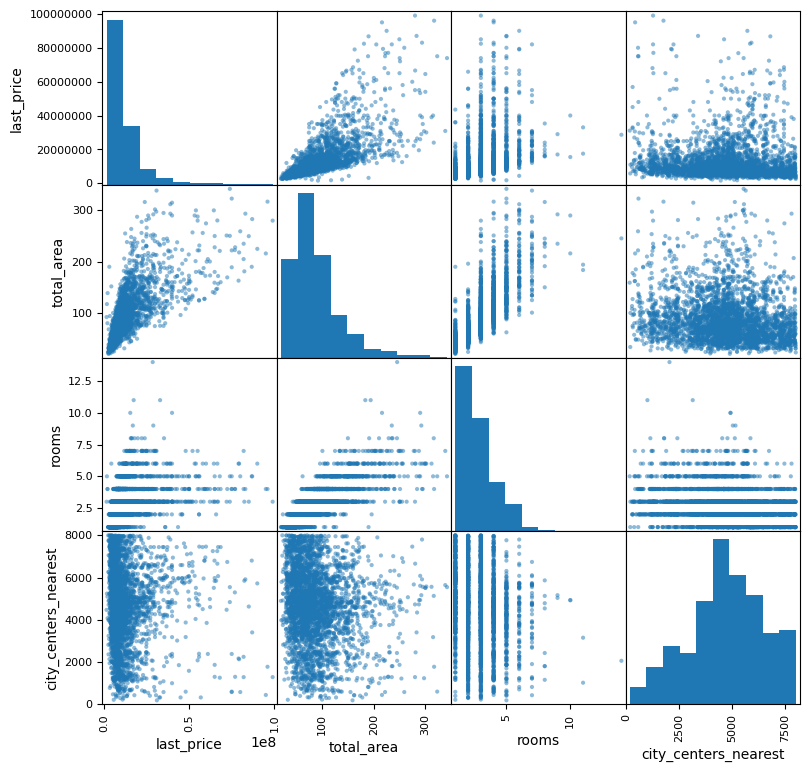

In [121]:
impact_on_price_center = data_center[['last_price','total_area','rooms','city_сenters_nearest']]
display(impact_on_price_center.corr())

print('Зависимость цены от общей площади')
impact_on_price_center.groupby('total_area')['last_price'].median().plot()
plt.show()
print('Зависимость цены от количества комнат')
impact_on_price_center.groupby('rooms')['last_price'].median().plot()
plt.show()
print('Зависимость цены от расстояния от центра города')
impact_on_price_center.groupby('city_сenters_nearest')['last_price'].median().plot()
plt.show()

print('Матрица рассеяния')
pd.plotting.scatter_matrix(impact_on_price_center, figsize=(9, 9)) 

**Вывод:**
- Как и в анализе всей базы - обнаружена высокая линейная зависимость цены квартиры от общей площади (Показатель корреляции : 0,72 против 0,75 при анализе всей базы). Особенно высокая корреляция у квартир до 150 метров, что видно из первого графика.
- Так же есть достаточно высокая линейная зависимость цены квартиры от количества комнат (Показатель корреляции : 0,41 против 0,46 при анализе всей базы).
- **Зависимости от расстояния от центра города нет**. Если квартира находится в диапазоне до 8км от центра - этот показатель на цену больше не влияет. (При анализе всей базы прослеживалась ленейная зависимость - Показатель обратной корреляции : -0,30).

<div class="alert alert-info"> Анализ, зависимости <b>цены</b> от того, <b>на каком этаже расположена квартира: первом, последнем или другом.</b> Для более точного анализа возьмем <b>цену квадратного метра</b>. Анализ для квартир в центре Санкт-Петербурга.</div>

Корреляция цены от категории этажа


,square_meter_price,floor_category
square_meter_price,1.000,0.182
floor_category,0.182,1.000


= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Категории:
    0 - первый этаж
    1 - последний этаж
    2 - другой
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Медианное значение цен на квартиры в разных категориях этажности


<AxesSubplot:xlabel='floor_category'>

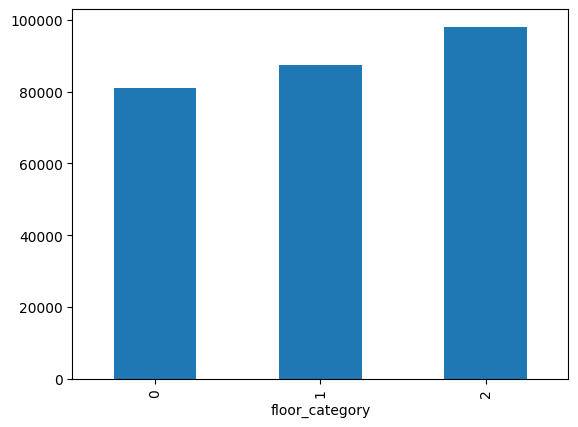

In [122]:
impact_on_price_flour_center = data[['square_meter_price','floor_category']]
print('Корреляция цены от категории этажа')
display(impact_on_price_flour_center.corr())

print(60* '= ')
print('Категории:')
print('    0 - первый этаж')
print('    1 - последний этаж')
print('    2 - другой')
print(60* '= ')

print('Медианное значение цен на квартиры в разных категориях этажности')
impact_on_price_flour_center.groupby('floor_category')['square_meter_price'].median().plot(kind='bar')


**Вывод:**

Найдена такая же невысокая зависимость цены кв.м от того на каком этаже находится квартира, как и при анализе всего датафрейма. Корреляция такая же- 0,18.

<div class="alert alert-info"> Анализ зависимости <b>цены от даты размещения</b>: дня недели, месяца и года. Для более точного анализа возьмем цену квадратного метра. Анализ для квартир в центре Санкт-Петербурга.</div>

In [123]:
impact_on_price_data_center = data[['last_price','day_of_week_exposition','month_exposition','year_exposition']]
print('Корреляция цены от даты размещения обьявления')
display(impact_on_price_data_center.corr())


Корреляция цены от даты размещения обьявления


,last_price,day_of_week_exposition,month_exposition,year_exposition
last_price,1.000,-0.008,0.002,-0.045
day_of_week_exposition,-0.008,1.000,0.010,-0.006
month_exposition,0.002,0.010,1.000,-0.277
year_exposition,-0.045,-0.006,-0.277,1.000


**Выводы:**
Корреляции цены от даты размещения идетичны тем, что получились для всего датасета. Зависимости не найдено.

### Вывод: 

**Был проведен исследовательский анализ данных. А именно:**

- В датасете были обнаружены выбивающиеся значения(выбросы). Они были убраны из датасета для получения более корректных результатов анализа. После удаление строк с пропусками и выбросов в датасете осталось 22941 из 23699 строк. Было удалено 758 строк. Это 3% от всего датасета. 

**Анализ сроков продажи квартиры**
- Минимально продажа квартиры занимает - 1 день. Максимально - 1580 дней.
- Медиана - 95 дней, а значит чаще всего квартиры продаются за 3 месяца. График это подтверждает.
- Среднее значение - 180 дней, намного выше медианы. Вероятно такая разница образовалась из-за небольшого количества квартир, которые висят в продаже годами.
- Быстрой можно считать продажу до 45 дней. у 25% всей базы получилось продать квартиру за этот срок.
- Долгой соответственно считаем продажу выше 230 дней. 75% всей базы продают квартиры быстрее.

**Анализ влияние разных параметров на общую цену квартиры во всем датасете:**

- Обнаружена высокая линейная зависимости цены квартиры от общей площади (Показатель корреляции : 0,75). Особенно высокая корреляция у квартир до 100 метров, что видно из первого графика.
- Есть достаточно высокая линейная зависимости цены квартиры от количества комнат (Показатель корреляции : 0,46).
- Расстояние от центра города влияет на цену квартиры меньше, чем предыдущие показатели, но зависимость также прослеживается. (Показатель обратной корреляции : -0,30). На диаграмме виден большой всплеск цены на маленьких расстояниях до 10км.
- Найдена невысокая зависимость цены кв.м от того на каком этаже находится квартира: на первом, последнем или любом другом. Корреляция - 0,18. На первом этаже - самые дешевые квартиры, на последнем - дороже, на этажах между первым и последним - самые дорогие.
- Зависимостью между датой размещения(днем недели, месяцем, годом) и ценой - не выявлено.

**Сравнение разных параметров квартир в Санкт-Петербурге и во всем датасете**

- Медиана цены квартиры в центре Санкт-Петербурга выше, чем в среднем по датасету практически в 2 раза. (9 млн.руб против 4,6 млн.руб во всем дата сете).
- Цена квадратного метра так же выше, но разница уже не такая весомая (122тыс.руб в центре Питера против 95тыс.руб во всем датасете)
- Площадь квартир в центре Санкт-Петербурга намного выше, чем в среднем по всему датасету (76кв против 52кв). 
- Количество комнат в центра Санкт-Петербурга так же больше (3 комнаты, против 2 - в общем датасете).
- Потолки в центре Санкт-Петербурга выше, чем в общем датасете (2.8м против 2,65м).

**Влияние на цену квартиры в Санкт-Петербурге:**
- Так же как и в анализе всей базы - обнаружена высокая линейная зависимость цены квартиры от общей площади (Показатель корреляции : 0,72), количества комнат(Показатель корреляции : 0,41) и этажности (Корреляция такая же- 0,18). Итоги такие же как при анализе общего датасета. Зависимости между датой размещения(днем недели, месяцем, годом) и ценой - не выявлено. 
- **Зависимости от расстояния от центра города нет.** Если квартира находится в диапазоне до 8км от центра - этот показатель на цену больше не влияет. (При анализе всей базы прослеживалась ленейная зависимость - Показатель обратной корреляции : -0,30).

## Общий вывод

**1. Общая информация о датасете:**
- В таблице информация о **23699** обьектах недвижимости
- Типы данных в столбцах: **first_day_exposition, floors_total, is_apartment, balcony, parks_around3000, ponds_around3000 и days_exposition** не соответствуют верным.
- Есть пропуски данных в **14ти из 22 столбцах.**
- Больше всего пропусков данных в столбцах : **is_apartment**(более 20 000), **parks_nearest**(более 15 000), **ponds_nearest**(более 14 000) и **balcony**(более 11 000)
- Полных дубликатов нет
- Во многих столбцах есть выбросы

**2. Была проведена предобработка данных,а именно:**

- Переименован столбец "cityCenters_nearest" в "city_сenters_nearest" для приведения таблицы к общему виду.
- Удалены строки с пропусками данных в столбцах floors_total и locality_name. Осталось 23301 из 23699 строк.
- Медианой по столбцу были заполнены пропуски данных в столбце ceiling_height
- Пропуски в столбцах kitchen_area и living_area были заполнены через медианный коэффициент к total_area
- Пропуски в столбцах days_exposition, balcony, parks_around3000 и ponds_around3000 заполнили нулем. Так как пропуск - отзначает отсутствие парка, балкона, водоема. В days_exposition - чтобы не терять данные.
- Пропуски в столбце is_apartment заполнили значениями False, так как пропуск вероятнее всего обозначает, что данная квартира не является апартаментами
- В столбце locality_name удалили неявные дубликаты. Было 364 населенных пункта, осталось 322.
- Изменили типы данных на более подходящие в столбцах - first_day_exposition, is_apartment, balcony, floors_total, ponds_around3000, parks_around3000, days_exposition

**3. Были рассчитаны и добавлены в таблицу такие показатели как:**

- **Цена квадратного метра** - square_meter_price. Получили данные путем деления цены (last_price) на площадь квартиры в квадратных метрах (total_area).
- **День недели** (day_exposition), **месяц** (month_exposition) и **год** публикации объявления (year_exposition)
- **Категории квартир в зависимоси от этажа**. Категории: первый, последний, другой - добавим в новый столбец floor_category.
- **Коэффициент отношения жилой к общей площади.** Добавляем рассчет в столбец ratio_living_total
- **Коэффициент отношения площади кухни к общей площади.** Добавляем рассчет в столбец ratio_kitchen_total.

**4. Был проведен исследовательский анализ данных. А именно:**

- В датасете были обнаружены выбивающиеся значения(выбросы). Они были убраны из датасета для получения более корректных результатов анализа. После удаление строк с пропусками и выбросов в датасете осталось 22941 из 23699 строк. Было удалено 758 строк. Это 3% от всего датасета. 

**Анализ сроков продажи квартиры**
- Минимально продажа квартиры занимает - 1 день. Максимально - 1580 дней.
- Медиана - 95 дней, а значит чаще всего квартиры продаются за 3 месяца. График это подтверждает.
- Среднее значение - 180 дней, намного выше медианы. Вероятно такая разница образовалась из-за небольшого количества квартир, которые висят в продаже годами.
- Быстрой можно считать продажу до 45 дней. у 25% всей базы получилось продать квартиру за этот срок.
- Долгой соответственно считаем продажу выше 230 дней. 75% всей базы продают квартиры быстрее.

**Анализ влияния разных параметров на общую цену квартиры во всем датасете:**

- Обнаружена высокая линейная зависимости цены квартиры от общей площади (Показатель корреляции : 0,75). Особенно высокая корреляция у квартир до 100 метров, что видно из первого графика.
- Есть достаточно высокая линейная зависимости цены квартиры от количества комнат (Показатель корреляции : 0,46).
- Расстояние от центра города влияет на цену квартиры меньше, чем предыдущие показатели, но зависимость также прослеживается. (Показатель обратной корреляции : -0,30). На диаграмме виден большой всплеск цены на маленьких расстояниях до 10км.
- Найдена невысокая зависимость цены кв.м от того на каком этаже находится квартира: на первом, последнем или любом другом. Корреляция - 0,18. На первом этаже - самые дешевые квартиры, на последнем - дороже, на этажах между первым и последним - самые дорогие.
- Зависимостью между датой размещения(днем недели, месяцем, годом) и ценой - не выявлено.

**Итог: На общую цену влияет:**

     - 1. Площадь квартиры(корр 0,75)
     - 2. Количество комнат(корр 0,46)
     - 3. Расстояние от центра города(корр -0,3)
     - 4. Этажность (корр 0,18). На первом этаже - самые дешевые квартиры, на последнем - дороже, на этажах между первым и последним - самые дорогие.

**Сравнение разных параметров квартир в Санкт-Петербурге и во всем датасете**

- Медиана цены квартиры в центре Санкт-Петербурга выше, чем в среднем по датасету практически в 2 раза. (9 млн.руб против 4,6 млн.руб во всем дата сете).
- Цена квадратного метра так же выше, но разница уже не такая весомая (122тыс.руб в центре Питера против 95тыс.руб во всем датасете)
- Площадь квартир в центре Санкт-Петербурга намного выше, чем в среднем по всему датасету (76кв против 52кв). 
- Количество комнат в центра Санкт-Петербурга так же больше (3 комнаты, против 2 - в общем датасете).
- Потолки в центре Санкт-Петербурга выше, чем в общем датасете (2.8м против 2,65м).

**Влияние на цену квартиры в Санкт-Петербурге:**
- Зависимость площади, количества комнат и этажности - такое же как в общем датасете.
- **Зависимости от расстояния от центра города нет.** Если квартира находится в диапазоне до 8км от центра - этот показатель на цену больше не влияет. (При анализе всей базы прослеживалась ленейная зависимость - Показатель обратной корреляции : -0,30).